In [1]:
import docx
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
import time
import glob  
import sys
import os
import natsort
import plotly
from time import gmtime, strftime
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import matplotlib.font_manager as fm
import matplotlib
from matplotlib import rc
fontprop = rc('font', family='AppleGothic')

# 2  현장 엑셀 파일 읽어 들이기

In [2]:
nowpath=os.getcwd()
excel_url = nowpath+'/reference/energy_audit_report.xlsx'
df = pd.read_excel(excel_url)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/donghokim/Desktop/work/reference/energy_audit_report.xlsx'

In [32]:
ch1_1_1 = pd.read_excel(excel_url, sheet_name = 0)
ch1_1_2 = pd.read_excel(excel_url, sheet_name =1)
ch1_2_1 = pd.read_excel(excel_url, sheet_name = 2)
ch1_2_2 = pd.read_excel(excel_url, sheet_name = 3)
ch1_2_3 = pd.read_excel(excel_url, sheet_name =4)
ch1_3_1 = pd.read_excel(excel_url, sheet_name =5)
ch1_3_2 = pd.read_excel(excel_url, sheet_name =6)
ch1_3_3 = pd.read_excel(excel_url, sheet_name =7)
ch1_3_4 = pd.read_excel(excel_url, sheet_name =8)
ch1_3_5 = pd.read_excel(excel_url, sheet_name =9)
ch1_4 = pd.read_excel(excel_url, sheet_name =10)
ch2_2_1 = pd.read_excel(excel_url, sheet_name =11)
ch2_2_4 = pd.read_excel(excel_url, sheet_name =12)
ch3_1_1= pd.read_excel(excel_url, sheet_name =13)
ch3_1_4a = pd.read_excel(excel_url, sheet_name=14)
ch3_1_4b = pd.read_excel(excel_url, sheet_name =15)
ch3_1_4c = pd.read_excel(excel_url, sheet_name =16)
ch3_1_4d = pd.read_excel(excel_url, sheet_name =17)
ch3_1_4e = pd.read_excel(excel_url, sheet_name =18)
ch3_1_4f = pd.read_excel(excel_url, sheet_name =19)
ch3_1_44 = pd.read_excel(excel_url, sheet_name =20)
ch3_1_45 = pd.read_excel(excel_url, sheet_name =21)
ch3_2_3a = pd.read_excel(excel_url, sheet_name =22)
ch3_2_3b = pd.read_excel(excel_url, sheet_name =23)
ch3_2_41a = pd.read_excel(excel_url, sheet_name =24)
ch3_2_41b= pd.read_excel(excel_url, sheet_name =25)
ch3_2_41c = pd.read_excel(excel_url, sheet_name =26)
ch3_3_1 = pd.read_excel(excel_url, sheet_name =27)
ch3_3_33 = pd.read_excel(excel_url, sheet_name =28)
ch3_4_3a = pd.read_excel(excel_url, sheet_name =29)
ch3_4_3b = pd.read_excel(excel_url, sheet_name =30)
ch3_4_41a = pd.read_excel(excel_url, sheet_name =31)
ch3_4_41b = pd.read_excel(excel_url, sheet_name =32)
ch3_4_42 = pd.read_excel(excel_url, sheet_name =33)
ch3_5_1a = pd.read_excel(excel_url, sheet_name =34)
ch3_5_1b = pd.read_excel(excel_url, sheet_name =35)
ch3_5_2a = pd.read_excel(excel_url, sheet_name =36)
ch3_5_2b = pd.read_excel(excel_url, sheet_name =37)
ch3_5_2c = pd.read_excel(excel_url, sheet_name =38)
ch3_5_2d = pd.read_excel(excel_url, sheet_name =39)
ch3_5_42 = pd.read_excel(excel_url, sheet_name =40)
ch3_5_43 = pd.read_excel(excel_url, sheet_name =41)
ch3_5_44a = pd.read_excel(excel_url, sheet_name =42)
ch3_5_44b = pd.read_excel(excel_url, sheet_name =43)
ch3_5_45 = pd.read_excel(excel_url, sheet_name =44)
ch3_5_45a = pd.read_excel(excel_url, sheet_name =45)
ch3_5_46 = pd.read_excel(excel_url, sheet_name =46)
ch3_5_47 = pd.read_excel(excel_url, sheet_name =47)
ch3_6_1 = pd.read_excel(excel_url, sheet_name =48)
ch3_6_2a = pd.read_excel(excel_url, sheet_name =49)
ch3_6_3 = pd.read_excel(excel_url, sheet_name =50)
ch3_6_41 = pd.read_excel(excel_url, sheet_name =51)
ch3_6_42 = pd.read_excel(excel_url, sheet_name =52)
ch3_6_44 = pd.read_excel(excel_url, sheet_name =53)
ch3_7_1 = pd.read_excel(excel_url, sheet_name =54)
ch3_7_2 = pd.read_excel(excel_url, sheet_name =55)

## 엑셀 파일 병합

In [33]:
path_dir = './excel'
file_list = natsort.natsorted(os.listdir(path_dir),reverse=False)
all_data = pd.DataFrame()
da = []
for i in range(len(file_list)):
    da = pd.read_excel('./excel/'+file_list[i],sheet_name='List User')  

    df = pd.DataFrame(da)
    all_data = all_data.append(df, ignore_index=True)
all_data.to_csv(nowpath+'/reference/energy.csv')

In [34]:
a=pd.DataFrame(file_list)
a.to_csv(nowpath+'/reference/file_list.csv')

In [35]:
ismart = pd.read_csv(nowpath+'/reference/energy.csv')
ismart = ismart.iloc[:,1:]
ismart.columns = ['timestamp','usage','max_usage']

In [36]:
timestamp = ismart.timestamp
day = timestamp.str.slice(start=0,stop=10)
times = timestamp.str.slice(start=11,stop=20)
year = timestamp.str.slice(start=0,stop=4)
month = timestamp.str.slice(start=5,stop=7)
hour = timestamp.str.slice(11,13)
week = []
for time in timestamp:
    y = int(time[0:4])
    m = int(time[5:7])
    d = int(time[8:10])
    week.append(datetime.date(y,m,d).weekday())
week = np.array(week)
weekday = np.where(week==0,'월요일',
                   np.where(week==1,'화요일',
                           np.where(week==2,'수요일',
                                   np.where(week==3,'목요일',
                                           np.where(week==4,'금요일',
                                                   np.where(week==5,'토요일','일요일'))))))

ismart['day'] = day
ismart['time'] = times
ismart['year'] = year
ismart['month'] = month
ismart['week'] = week
ismart['weekday'] = weekday
ismart['hour'] = hour
year_range = ismart.year.unique().size
year_max = ismart.year.unique().max()
years = ismart.year.unique()

In [37]:
#현재년도 월별 에너지 사용량
curr_year = ismart.year.unique().max()
curr_monthly_usage = ismart[ismart.year==curr_year].groupby('month').usage.sum()

In [38]:
#년도별 에너지 총 사용량
total_usage = ismart.groupby('year').usage.sum()
#년도별 월별 에너지 총 사용량
total_monthly_usage = ismart.groupby(['year','month']).usage.sum()
year_monthly_usage = total_monthly_usage.reset_index().pivot(index='year',columns='month',values='usage').fillna(0)

rowsum = []
for i in year_monthly_usage.index:
    tmp = np.sum(year_monthly_usage[year_monthly_usage.index==i].values)
    rowsum.append(tmp)

year_monthly_usage['rowsum'] = rowsum

colsum = []
for i in year_monthly_usage.columns:
    tmp = np.sum(year_monthly_usage[i])
    colsum.append(tmp)

#년도별 월별 peak 에너지 총 사용량
total_monthly_maxdemand = ismart.groupby(['year','month']).max_usage.sum()
year_monthly_maxdemand = total_monthly_maxdemand.reset_index().pivot(index='year',columns='month',values='max_usage').fillna(0)

rowsum = []
for i in year_monthly_maxdemand.index:
    tmp = np.sum(year_monthly_maxdemand[year_monthly_maxdemand.index==i].values)
    rowsum.append(tmp)

year_monthly_maxdemand['rowsum'] = rowsum


colsum_maxdemand = []
for i in year_monthly_maxdemand.columns:
    tmp = np.sum(year_monthly_maxdemand[i])
    colsum_maxdemand.append(tmp)

winter = ismart.query("month in ['11','12','01','02','03','04']")
summer = ismart.query("month in ['06','07','08','09']")
middle = ismart.query("month in ['05','10']")

ismart_weekday = ismart[ismart.year==curr_year].groupby(['weekday','time']).max_usage.mean()
ismart_week = ismart[ismart.year==curr_year].groupby(['weekday']).max_usage.mean()
ismart_month = ismart[ismart.year==curr_year].groupby(['month']).max_usage.mean()
ismart_hour = ismart[ismart.year==curr_year].groupby(['time']).max_usage.mean()

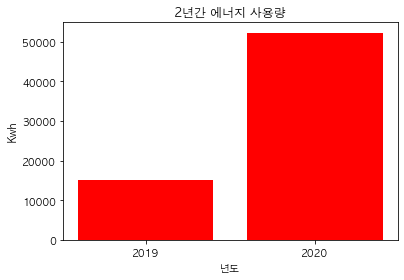

In [39]:
plt.figure(figsize=(6,4))
x = total_usage.values
y = (pd.Series(total_usage.index))
plt.xticks(range(len(x)), y)
plt.xlabel('년도')
plt.ylabel('Kwh')
plt.title(str(year_range)+'년간 에너지 사용량')
plt.bar(range(len(x)), x, color='red') 
plt.savefig('./images/total_year_usage.png',dpi=200, facecolor='#eeeeee', edgecolor='blue')

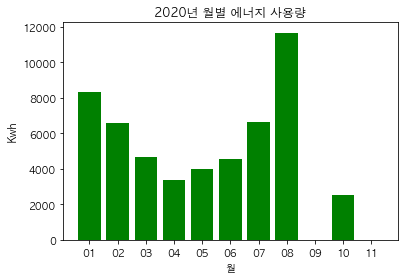

In [40]:
plt.figure(figsize=(6,4))
x = curr_monthly_usage.values
y = (pd.Series(curr_monthly_usage.index))
plt.xticks(range(len(x)), y)
plt.xlabel('월')
plt.ylabel('Kwh')
plt.title(str(curr_year)+'년 월별 에너지 사용량')
plt.bar(range(len(x)), x, color='green') 
plt.savefig('./images/year_hist_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')

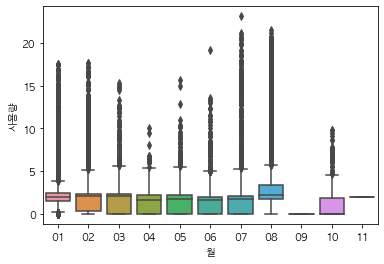

In [41]:
box_data = ismart.loc[ismart.year==curr_year,["month","usage"]]
box_data.columns = ['월','사용량']
sns.boxplot(x="월", y="사용량", data=box_data)
plt.savefig('./images/year_boxplot_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')

In [42]:
def make_elec(year,gubun):
    year = str(year)
    plt.figure(figsize=(6,4))
    df = ismart.loc[ismart.year==year,::].groupby(['month'])[gubun].sum()
    x = df.values
    y = (pd.Series(df.index))
    plt.xticks(range(len(x)), y)
    plt.xlabel('월')
    plt.ylabel('Mwh')
    plt.title(year+'년 월별 에너지 사용량')
    plt.bar(range(len(x)), x, color='green') 
    plt.savefig('./images/year_hist_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')

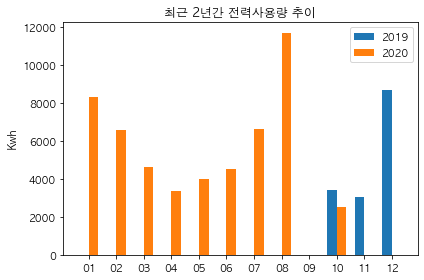

In [43]:

labels = ['01','02','03','04','05','06','07','08','09','10','11','12']
if year_monthly_usage.index.size == 3:
    name1 = year_monthly_usage.index[0]
    name2 = year_monthly_usage.index[1]
    name3 = year_monthly_usage.index[2]

    val1 = list(year_monthly_usage.iloc[0,0:12])
    val2 = list(year_monthly_usage.iloc[1,0:12])
    val3 = list(year_monthly_usage.iloc[2,0:12])

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, val1, width, label=name1)
    rects2 = ax.bar(x + width/2, val2, width, label=name2)
    rects3 = ax.bar(x + width/2, val2, width, label=name3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Kwh')
    ax.set_title('최근 3년간 전력사용량 추이')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()

    plt.savefig('./images/year_total_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
elif year_monthly_usage.index.size == 2:
    name1 = year_monthly_usage.index[0]
    name2 = year_monthly_usage.index[1]
    

    val1 = list(year_monthly_usage.iloc[0,0:12])
    val2 = list(year_monthly_usage.iloc[1,0:12])
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, val1, width, label=name1)
    rects2 = ax.bar(x + width/2, val2, width, label=name2)
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Kwh')
    ax.set_title('최근 2년간 전력사용량 추이')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()

    plt.savefig('./images/year_total_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
else:
    name1 = year_monthly_usage.index[0]
    

    val1 = list(year_monthly_usage.iloc[0,0:12])
    
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, val1, width, label=name1)
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Kwh')
    ax.set_title('최근 1년간 전력사용량 추이')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()

    plt.savefig('./images/year_total_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')

In [44]:
winter_weekday = winter.groupby(['year','weekday','hour','week']).usage.sum().reset_index()
summer_weekday = summer.groupby(['year','weekday','hour','week']).usage.sum().reset_index()

def season_usage_graph(year):
    weekday = winter_weekday[winter_weekday.year==year]
    title = '{}년 요일별 동절기 에너지 사용 현황'.format(year)
    document.add_heading(title)
    for i in np.sort(weekday.week.unique()):
        x = weekday[weekday.week == i].hour
        y = weekday[weekday.week == i].usage
        week = weekday[weekday.week == i].weekday.unique()
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-',color='red')
        plt.title(year+'년 동절기 '+week+' 에너지 사용량')
        plt.savefig('./images/week_winter_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/week_winter_usage.png")
    
    weekday = summer_weekday[summer_weekday.year==year]
    title = '{}년 요일별 하절기 에너지 사용 현황'.format(year)
    document.add_heading(title)
    for i in np.sort(weekday.week.unique()):
        x = weekday[weekday.week == i].hour
        y = weekday[weekday.week == i].usage
        week = weekday[weekday.week == i].weekday.unique()
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-')
        plt.title(year+'년 하절기 '+week+' 에너지 사용량')
        plt.savefig('./images/week_summer_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/week_summer_usage.png")

winter_max_weekday = winter.groupby(['year','weekday','hour','week']).max_usage.sum().reset_index()
summer_max_weekday = summer.groupby(['year','weekday','hour','week']).max_usage.sum().reset_index()

def season_max_graph(year):
    weekday = winter_max_weekday[winter_max_weekday.year==year]
    title = '{}년 동절기 요일별 최대수요'.format(year)
    document.add_heading(title)
    for i in np.sort(weekday.week.unique()):
        x = weekday[weekday.week == i].hour
        y = weekday[weekday.week == i].max_usage
        week = weekday[weekday.week == i].weekday.unique()
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-',color='red')
        plt.title(year+'년 동절기 '+week+' 최대수요 사용량')
        plt.savefig('./images/week_winter_max_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/week_winter_max_usage.png")
    
    weekday = summer_max_weekday[summer_weekday.year==year]
    title = '{}년 하절기 요일별 최대수요'.format(year)
    document.add_heading(title)
    for i in np.sort(weekday.week.unique()):
        x = weekday[weekday.week == i].hour
        y = weekday[weekday.week == i].max_usage
        week = weekday[weekday.week == i].weekday.unique()
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-')
        plt.title(year+'년 하절기 '+week+' 최대수요 사용량')
        plt.savefig('./images/week_summer_max_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/week_summer_max_usage.png")


In [45]:
usage_day = ismart.groupby(['year','month','day']).usage.sum().reset_index()
usage_month = usage_day.groupby(['year','month']).usage.max().reset_index()
def day_usage_graph(year):
    title = '{}년 월별 최대수요일 (usage 기반)'.format(year)
    document.add_heading(title)
    month = usage_day[usage_day.year==year].month
    for i in month.unique():
        document.add_heading('{}년 {}월'.format(year,i))
        year = year
        stmt = "(year== '"+year+"') and (month=='"+i+"')"
        usage = usage_month.query(stmt).usage
        usage = usage.values[0]
        stmt = stmt + " and (usage == '"+str(usage)+"')"
        if usage > 0:
            day = usage_day.query(stmt).day[0:1].values
        df = ismart[ismart.day==day[0]].groupby('hour').usage.sum().reset_index()
        x = df.hour
        y = df.usage
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-')
        plt.title(year+'년 '+i+' 월 최대사용일('+ day + ')현황')
        plt.savefig('./images/daily_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/daily_usage.png")

In [46]:
max_usage_day = ismart.groupby(['year','month','day']).max_usage.mean().reset_index()
max_usage_month = max_usage_day.groupby(['year','month']).max_usage.mean().reset_index()
def day_max_usage_graph(year):
    title = '{}년 월별 최대수요일 (max_usage 기반)'.format(year)
    document.add_heading(title)
    month = max_usage_day[max_usage_day.year==year].month
    for i in month.unique():
        document.add_heading('{}년 {}월'.format(year,i))
        year = year
        stmt = "(year== '"+year+"') and (month=='"+i+"')"
        usage = usage_month.query(stmt).usage
        usage = usage.values[0]
        stmt = stmt + " and (usage == '"+str(usage)+"')"
        if usage > 0:
            day = usage_day.query(stmt).day[0:1].values
        df = ismart[ismart.day==day[0]].groupby('hour').usage.sum().reset_index()
        x = df.hour
        y = df.usage
        plt.figure(figsize=(7,4))
        plt.xlabel('시간')
        plt.ylabel('Mwh')
        plt.plot(x,y,'bo-')
        plt.title(year+'년 '+i+' 월 최대사용일('+ day + ')현황')
        plt.savefig('./images/max_daily_usage.png', dpi=200, facecolor='#eeeeee', edgecolor='blue')
        document.add_picture("./images/max_daily_usage.png")

#  1장 일반현황
## 1.1  1. 일반현황

In [47]:
document = Document()

document.add_heading('제 1장 일반현황', level = 0) 
document.add_heading('1. 일반현황',     level = 1)
document.add_heading('1.1 일반현황',     level = 2)
data = pd.DataFrame(ch1_1_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])



<ipython-input-15-08067715497c>:27: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



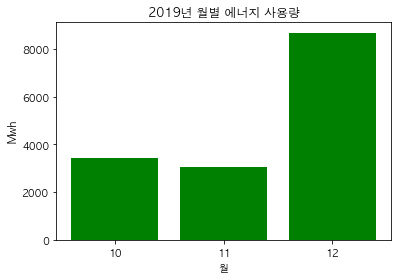

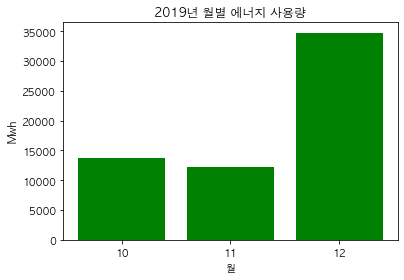

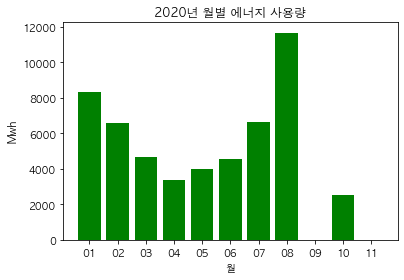

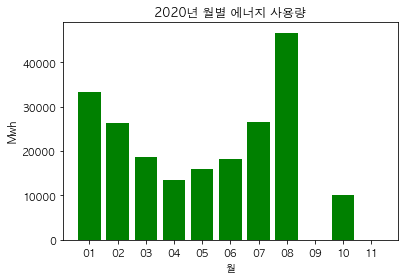

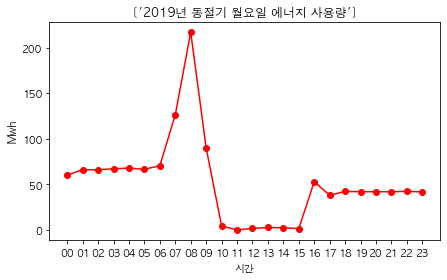

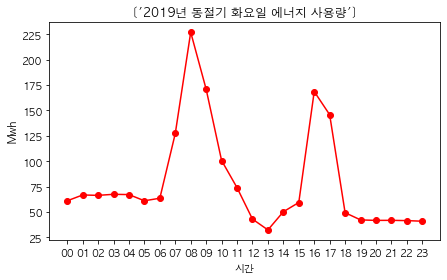

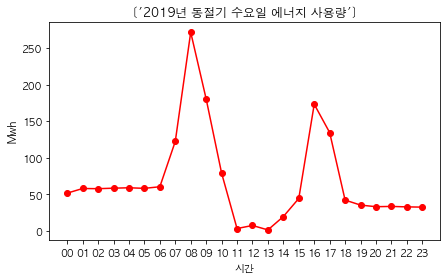

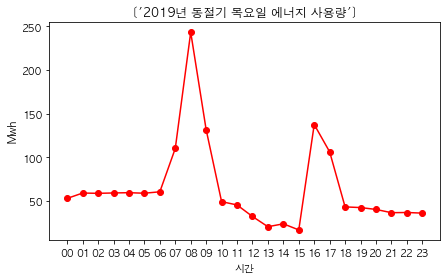

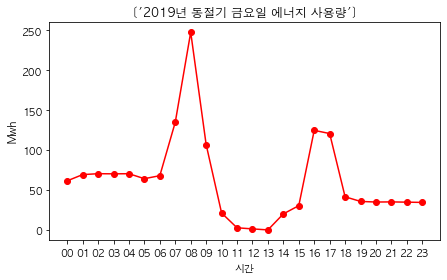

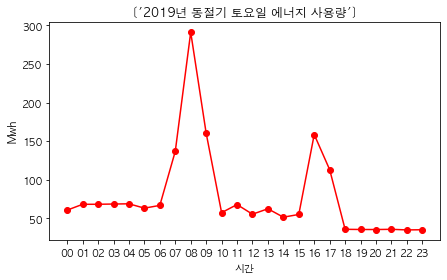

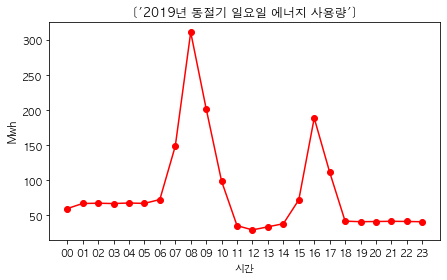

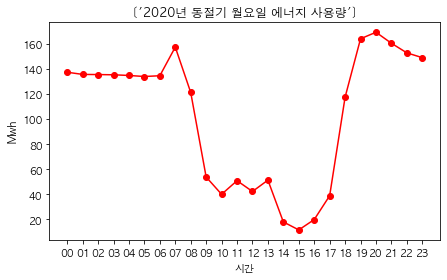

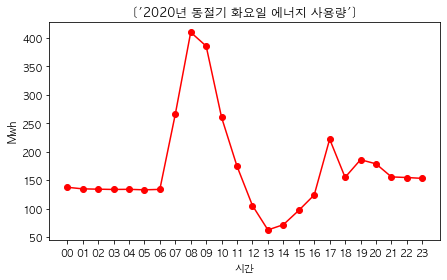

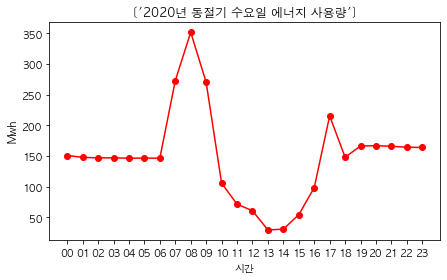

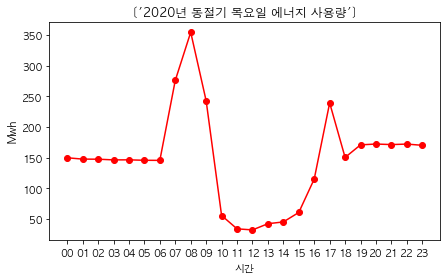

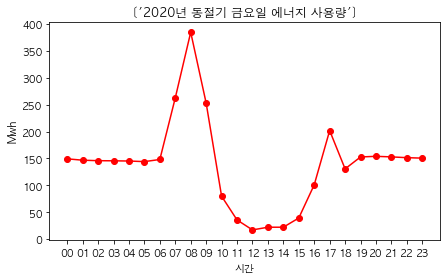

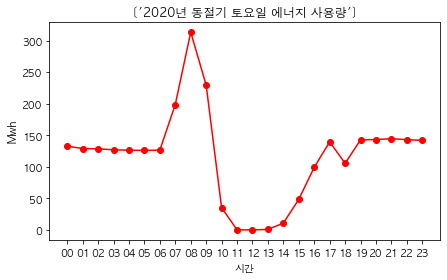

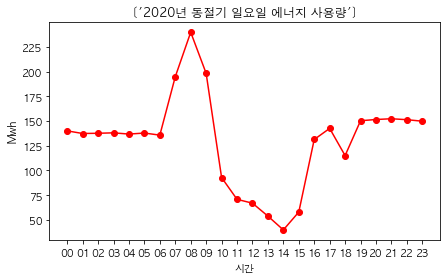

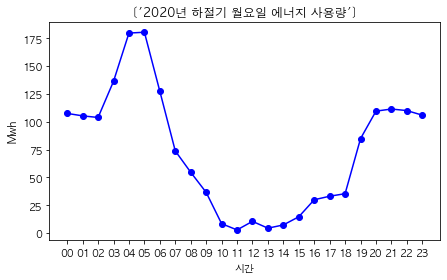

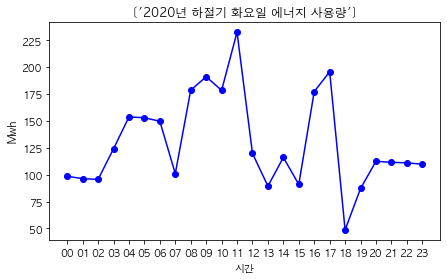

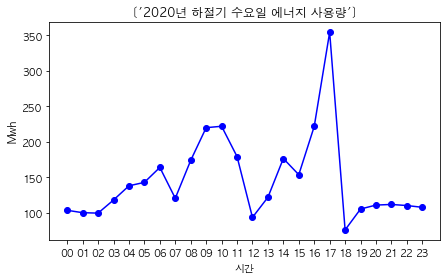

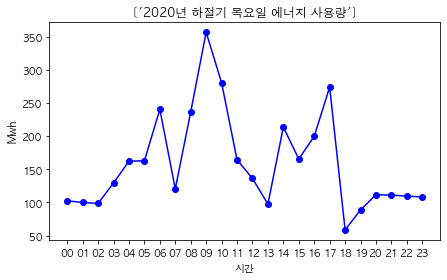

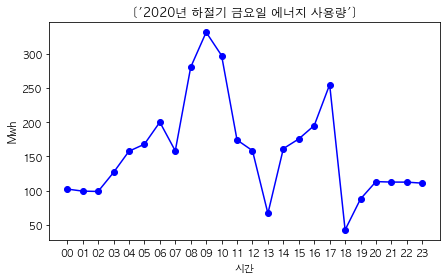

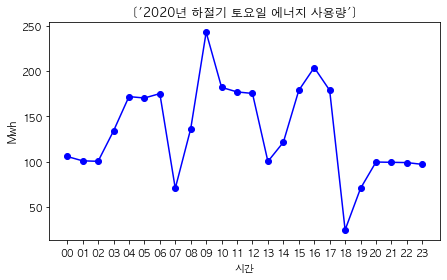

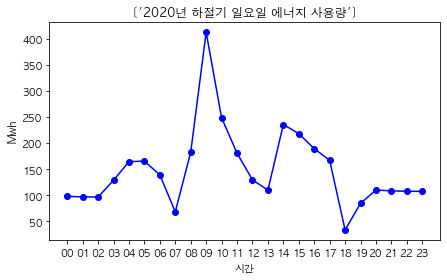

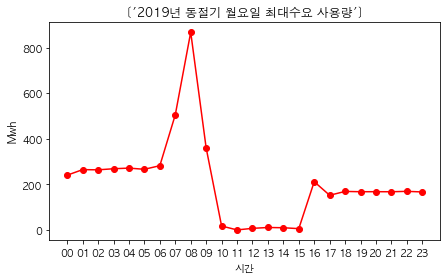

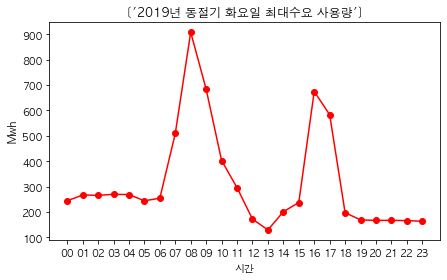

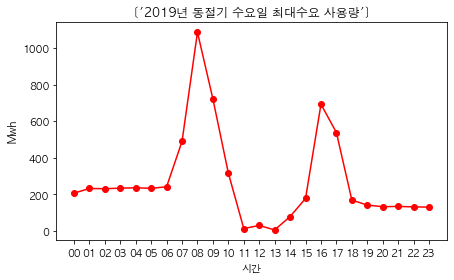

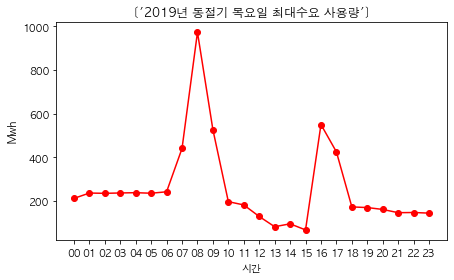

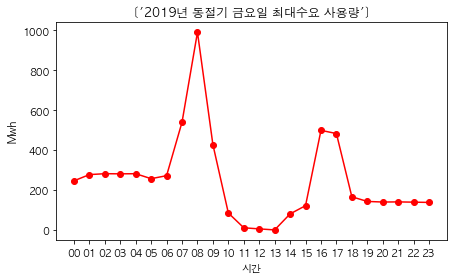

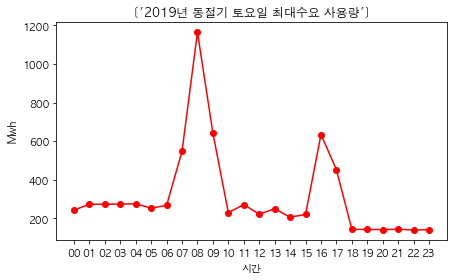

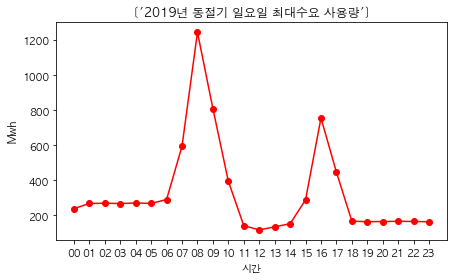

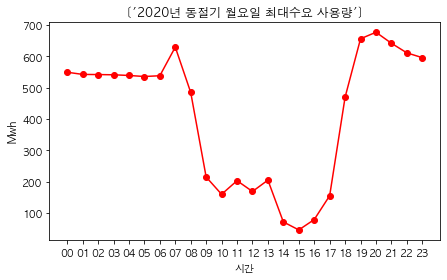

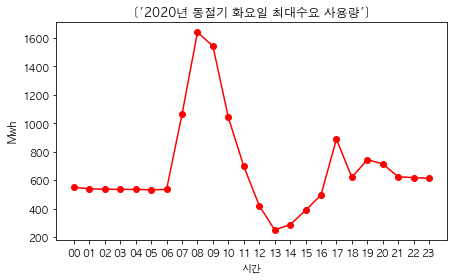

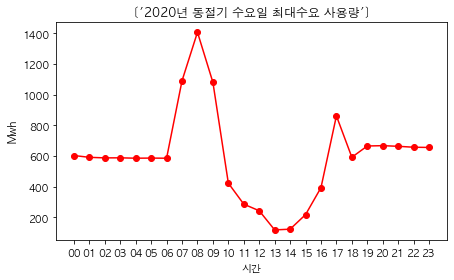

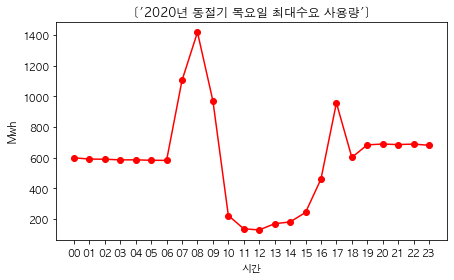

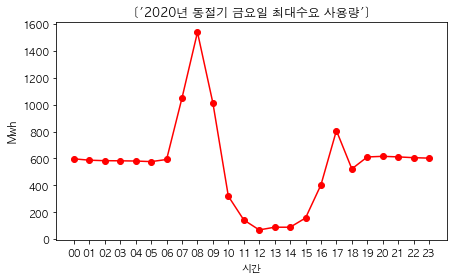

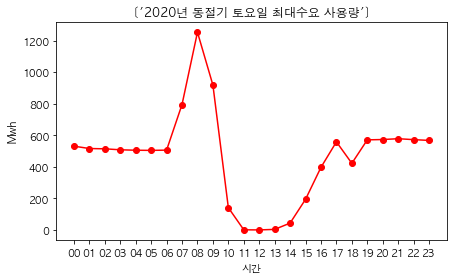

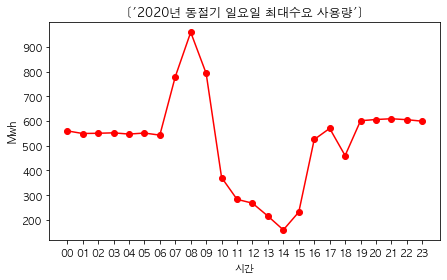

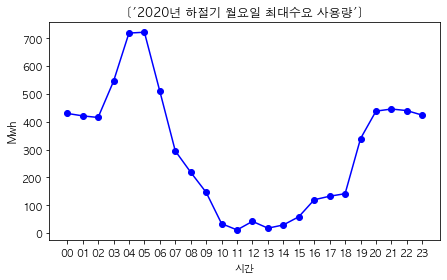

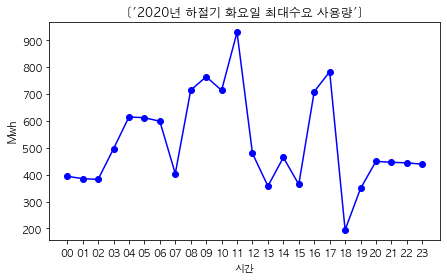

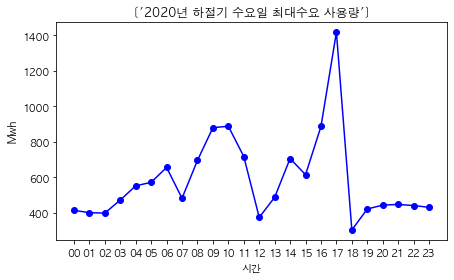

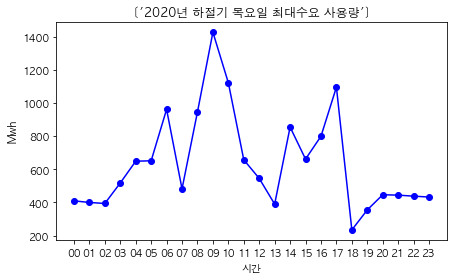

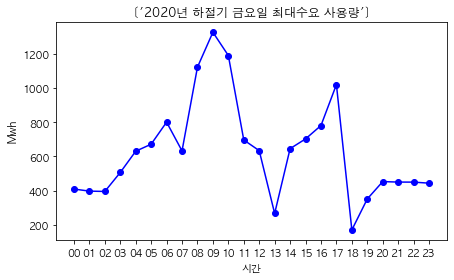

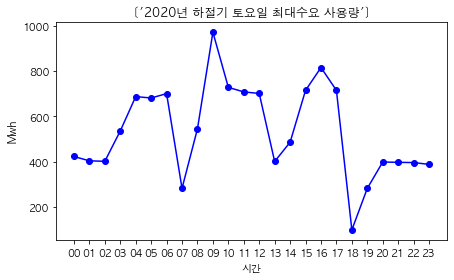

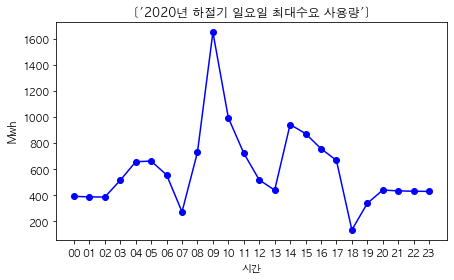

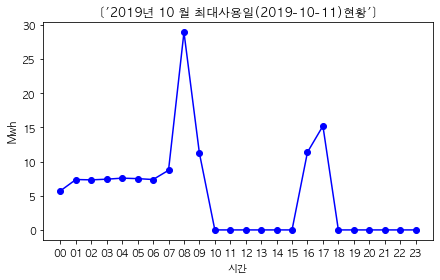

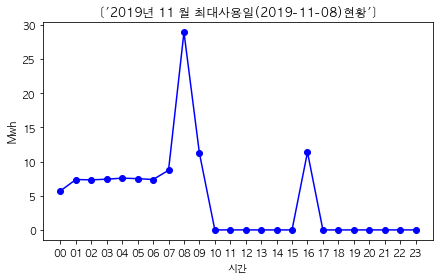

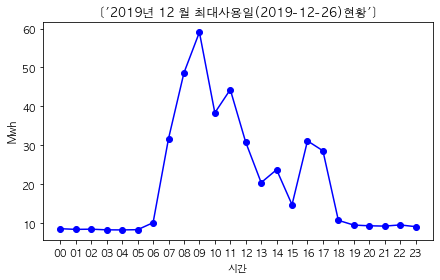

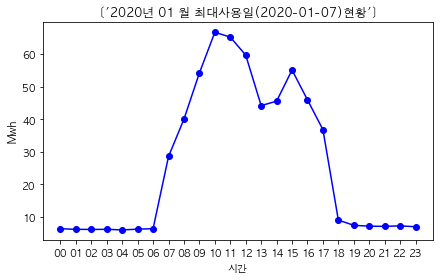

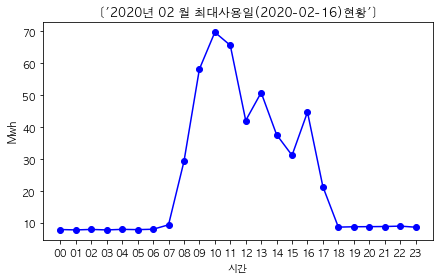

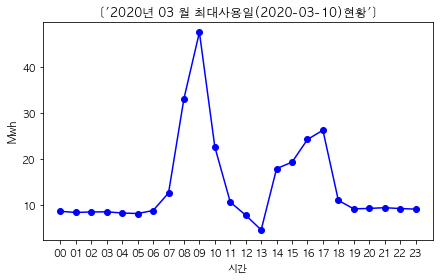

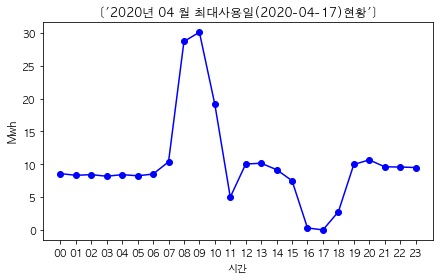

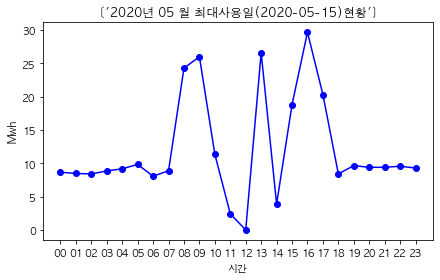

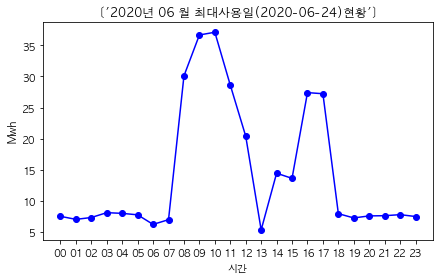

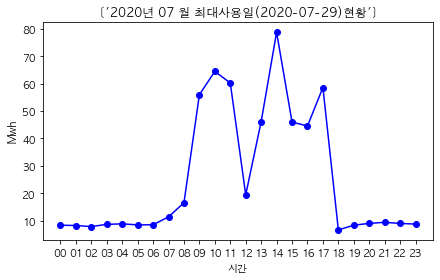

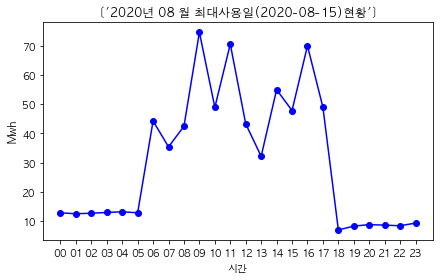

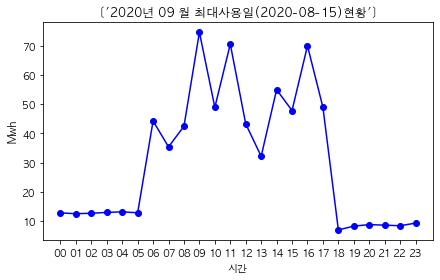

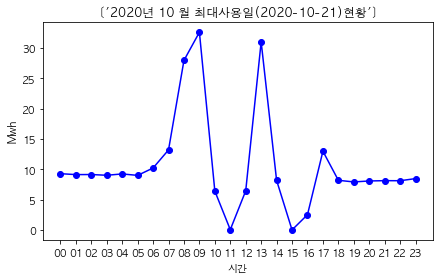

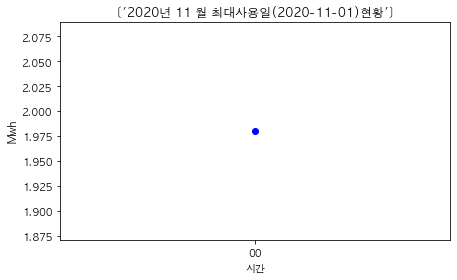

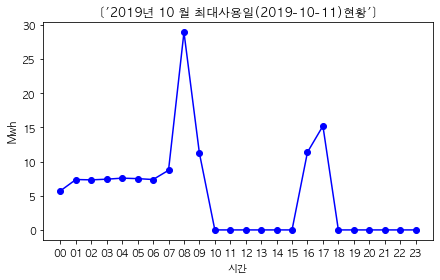

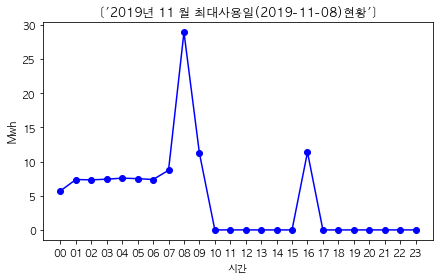

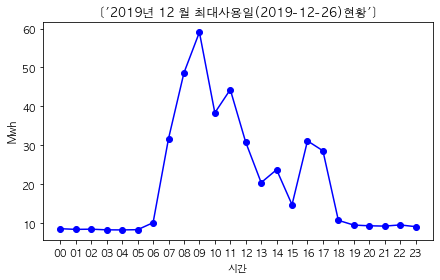

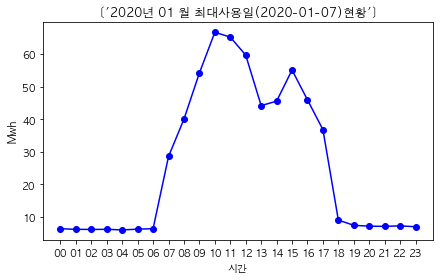

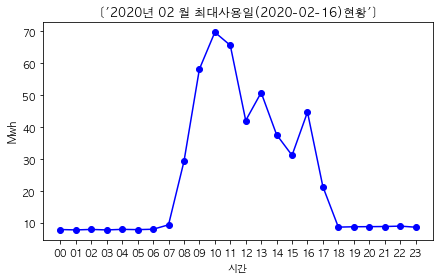

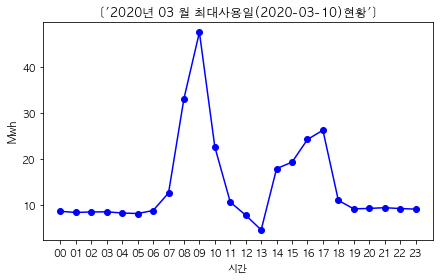

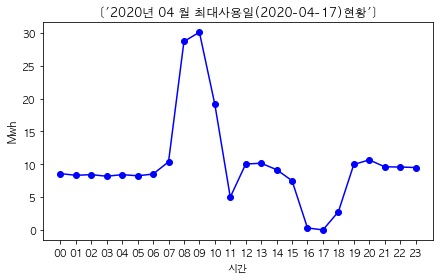

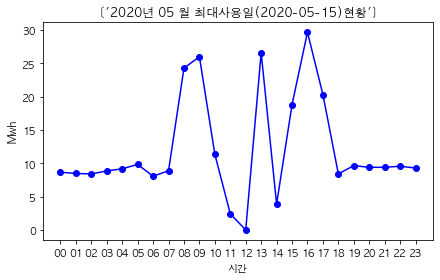

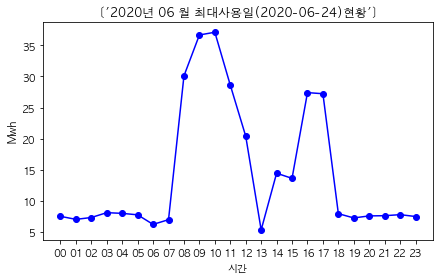

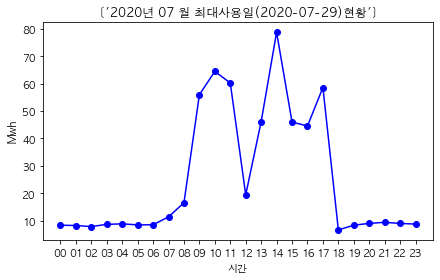

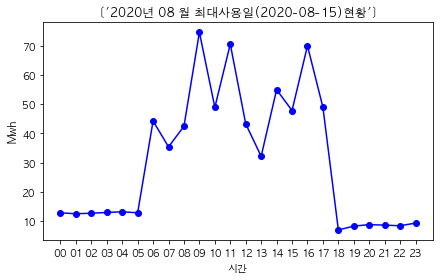

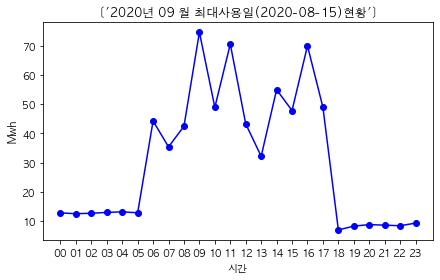

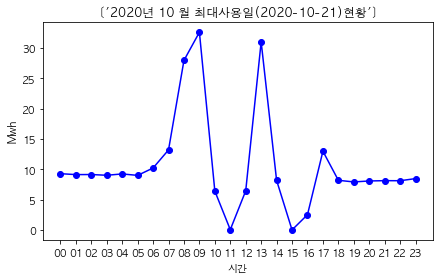

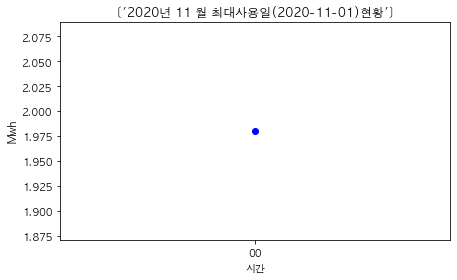

In [24]:
document = Document()

document.add_heading('제 1장 일반현황', level = 0) 
document.add_heading('1. 일반현황',     level = 1)
document.add_heading('1.1 일반현황',     level = 2)
data = pd.DataFrame(ch1_1_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('1.2 건물현황',     level = 2)
data = pd.DataFrame(ch1_1_2) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('2.에너지 사용 현황', level = 1)
document.add_heading('2.1 당해년도 에너지 사용 현황 및 온실가스 배출 현황', level = 2)
data = pd.DataFrame(ch1_2_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('2.2 1년전 에너지 사용 현황 및 온실가스 배출 현황', level = 2)
data = pd.DataFrame(ch1_2_2) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('2.3 2년전 에너지 사용 현황 및 온실가스 배출 현황', level = 2)
data = pd.DataFrame(ch1_2_3) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])    
        
title_1_1 = '5. {} 개년 통합 전력 분석'.format(year_range)
title_1_2 = '6. 전력 데이터 통계분석'
title_1_2_1 = ' 6.1 히스토그램'
title_1_2_2 = ' 6.2 박스플롯'
title_1_2_3 = '6.3 {}개년 월별 통합 분석'.format(year_range)
title_1_2_4 = '6.4 {}최대 전력 사용량 분석'.format(year_range)
title_1_3 = '7. {}년전 월별 통합 분석'.format(year_range-1)
title_1_3_1 = '7.1 {}년 Usage 기반 월별 분석'.format(year_range)
titie_1_4_1 = '8. 동절기/하절기 데이터 분석'

title_2 = '9. 용도별 전력 분석'
document = Document()
document.add_heading(title_1_1,1)
document.add_paragraph('- 년간 전력 사용그래프')
document.add_picture('./images/total_year_usage.png')
document.add_paragraph('- 년간 전력 사용표')
table_1 = document.add_table(rows = year_range+2, cols = 3)
table_1.style = document.styles['Table Grid']
table_1.cell(0,0).merge(table_1.cell(1,0))
table_1.cell(0,1).merge(table_1.cell(0,2))
table_1.cell(0,0).text = '구분'
table_1.cell(0,1).text = '전력사용량'
table_1.cell(1,1).text = '사용량[toe]'
table_1.cell(1,2).text = '사용금액[백만원]'

for i in range(ismart.year.unique().size):
    year = ismart.year.unique()[i]
    usage = ismart[ismart.year==year].usage.sum()
    table_1.cell(i+2,0).text = '{}년'.format(year)
    table_1.cell(i+2,1).text = format(round(usage,2),',')


document.add_heading(title_1_2,1)
document.add_heading(title_1_2_1,1)
document.add_picture('./images/year_hist_usage.png')
document.add_heading(title_1_2_2,1)
document.add_picture('./images/year_boxplot_usage.png') 
document.add_heading(title_1_2_3,1)
document.add_paragraph('- 월별 전력 사용그래프')
document.add_picture('./images/year_total_usage.png')
document.add_paragraph('- 월별 전력 사용표')
table_2 = document.add_table(rows = year_range+2, cols = 14)
table_2.style = document.styles['Table Grid']
table_2.cell(0,0).text = '구분'
table_2.cell(0,1).text = '1월'
table_2.cell(0,2).text = '2월'
table_2.cell(0,3).text = '3월'
table_2.cell(0,4).text = '4월'
table_2.cell(0,5).text = '5월'
table_2.cell(0,6).text = '6월'
table_2.cell(0,7).text = '7월'
table_2.cell(0,8).text = '8월'
table_2.cell(0,9).text = '9월'
table_2.cell(0,10).text = '10월'
table_2.cell(0,11).text = '11월'
table_2.cell(0,12).text = '12월'
table_2.cell(0,13).text = '합계'
table_2.cell(ismart.year.unique().size+1,0).text = '합계'

for i in range(13):
    for j in range(len(year_monthly_usage.index)):
                   table_2.cell(j+1,i+1).text = \
            str(round(float(year_monthly_usage.iloc[year_monthly_usage.index==year_monthly_usage.index[j],i]),2))

for i in range(len(year_monthly_usage)):
    table_2.cell(i+1,0).text = year_monthly_usage.index[i]

for i in range(13):
    table_2.cell(ismart.year.unique().size+1,i+1).text = format(round(colsum[i],2),',')
    
document.add_heading(title_1_2_4,1)
table_3 = document.add_table(rows = year_range+2, cols = 14)
table_3.style = document.styles['Table Grid']
table_3.cell(0,0).text = '구분'
table_3.cell(0,1).text = '1월'
table_3.cell(0,2).text = '2월'
table_3.cell(0,3).text = '3월'
table_3.cell(0,4).text = '4월'
table_3.cell(0,5).text = '5월'
table_3.cell(0,6).text = '6월'
table_3.cell(0,7).text = '7월'
table_3.cell(0,8).text = '8월'
table_3.cell(0,9).text = '9월'
table_3.cell(0,10).text = '10월'
table_3.cell(0,11).text = '11월'
table_3.cell(0,12).text = '12월'
table_3.cell(0,13).text = '합계'
table_3.cell(ismart.year.unique().size+1,0).text = '합계'

for i in range(13):
    for j in range(len(year_monthly_usage.index)):
                   table_3.cell(j+1,i+1).text = \
            str(round(float(year_monthly_maxdemand.iloc[year_monthly_maxdemand.index==year_monthly_maxdemand.index[j],i]),2))

for i in range(len(year_monthly_usage)):
    table_3.cell(i+1,0).text = year_monthly_usage.index[i]

for i in range(13):
    table_3.cell(ismart.year.unique().size+1,i+1).text = format(round(colsum_maxdemand[i],2),',')
    
#document.add_paragraph('최대전력 사용량 peak치가 가장 큰 달은 {0}월이며 사용량은 {1}  입니다.'.format('07',peak_value))

document.add_heading(title_1_3,1)



i = 0
while i < year_range:
    title1 = '3.1 {}년 Usage기반 월별분석'.format(years[i])
    title2 = '  2){}년 월별 생산량 및 전기 사용 현황'.format(years[i])
    document.add_heading(title1)
    document.add_paragraph(title2)
    
    
    make_elec(years[i],"usage")
    document.add_picture("./images/year_hist_usage.png")
    table = document.add_table(rows = 2, cols = 14)
    table.style = document.styles['Table Grid']
    table.cell(0,0).text = str(years[i])
    table.cell(0,1).text = '1월'
    table.cell(0,2).text = '2월'
    table.cell(0,3).text = '3월'
    table.cell(0,4).text = '4월'
    table.cell(0,5).text = '5월'
    table.cell(0,6).text = '6월'
    table.cell(0,7).text = '7월'
    table.cell(0,8).text = '8월'
    table.cell(0,9).text = '9월'
    table.cell(0,10).text = '10월'
    table.cell(0,11).text = '11월'
    table.cell(0,12).text = '12월'
    table.cell(0,13).text = '합계'
    table.cell(1,0).text = '전력사용량\n[MWh]'

    monthly_use = year_monthly_usage[year_monthly_usage.index == years[i]]
    for cell in range(13):
        table.cell(1,cell+1).text = str(round(monthly_use.iloc[0,cell],2))
    
      
    document.add_heading('{}년 demand_max기반 월별분석'.format(years[i]),1)
    document.add_paragraph('2){}년 월별 생산량 및 전기 사용 현황'.format(years[i]))
   
    make_elec(years[i],"max_usage")
    document.add_picture("./images/year_hist_usage.png")
    
    monthly_maxuse = year_monthly_maxdemand[year_monthly_maxdemand.index==years[i]]
    
    table1 = document.add_table(rows = 2, cols = 14)
    table1.style = document.styles['Table Grid']
    table1.cell(0,0).text = str(years[i])
    table1.cell(0,1).text = '1월'
    table1.cell(0,2).text = '2월'
    table1.cell(0,3).text = '3월'
    table1.cell(0,4).text = '4월'
    table1.cell(0,5).text = '5월'
    table1.cell(0,6).text = '6월'
    table1.cell(0,7).text = '7월'
    table1.cell(0,8).text = '8월'
    table1.cell(0,9).text = '9월'
    table1.cell(0,10).text = '10월'
    table1.cell(0,11).text = '11월'
    table1.cell(0,12).text = '12월'
    table1.cell(0,13).text = '합계'
    table1.cell(1,0).text = '전력사용량\n[MWh]'

    
    for cell in range(13):
        table1.cell(1,cell+1).text = str(round(monthly_maxuse.iloc[0,cell],2))
    
    i = i + 1


document.add_heading(titie_1_4_1,1)
document.add_heading('동절기/하절기 요일별 전력사용량 분석')
i = 0
while i < year_range:
    year = years[i]
    season_usage_graph(str(year))
    i = i+1

document.add_heading('동절기/하절기 요일별 최대수요분석')
i = 0
while i < year_range:
    year = years[i]
    season_max_graph(str(year))
    i = i+1

document.add_heading('5. {}개년 최대 사용월의 일별 데이터 분석'.format(year_range),1)
i = 0
while i < year_range:
    year = years[i]
    day_usage_graph(str(year))
    i= i+1

i = 0
while i < year_range:
    year = years[i]
    day_max_usage_graph(str(year))
    i= i+1



## 2장 일반 현황
### 2. 통계적 전력 분석  

<ipython-input-15-08067715497c>:27: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



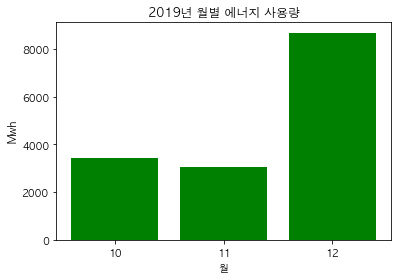

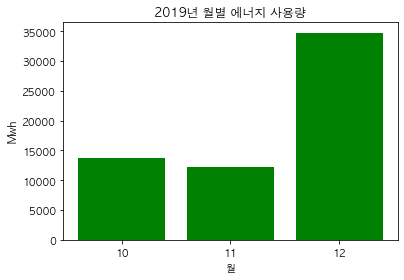

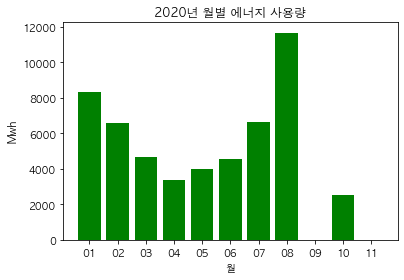

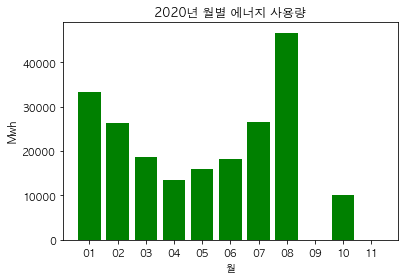

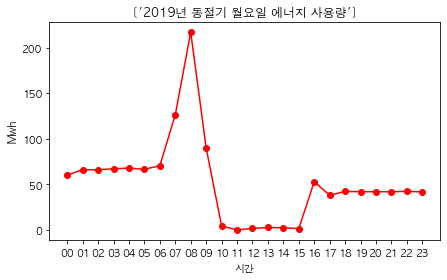

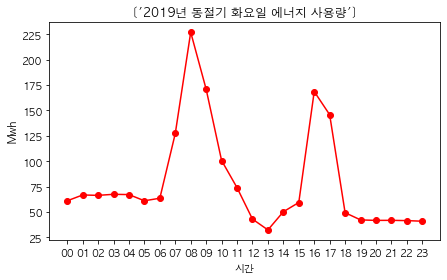

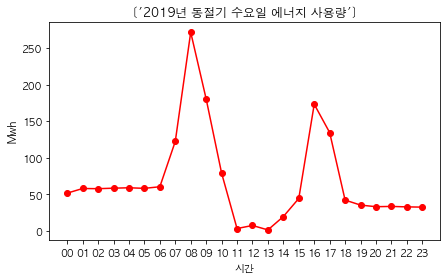

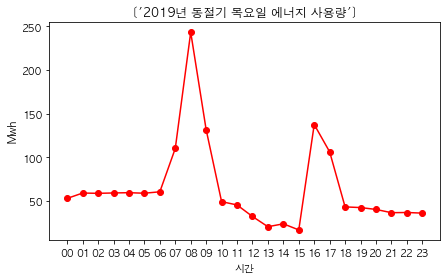

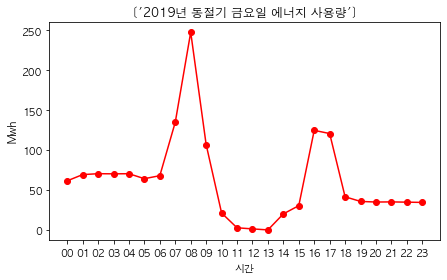

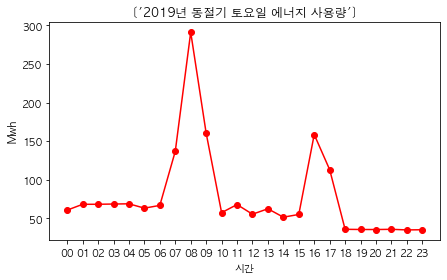

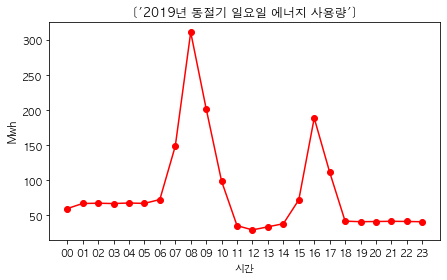

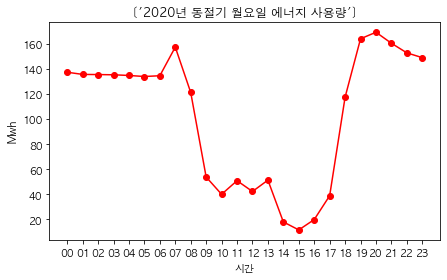

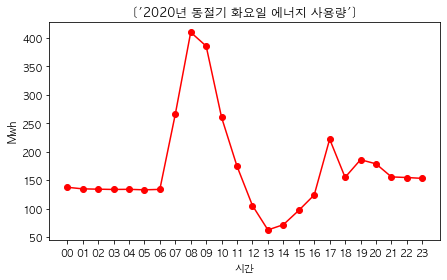

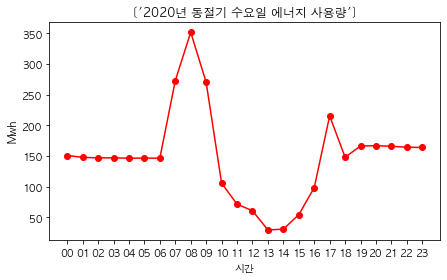

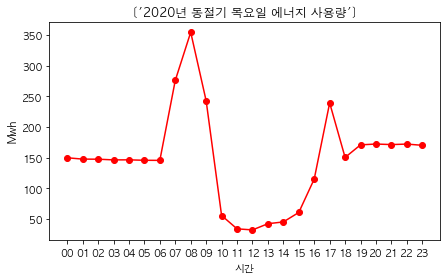

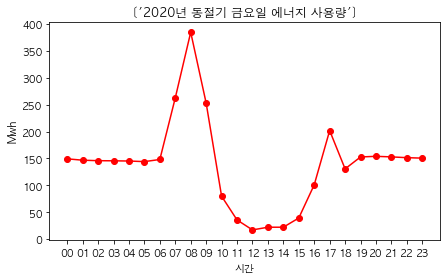

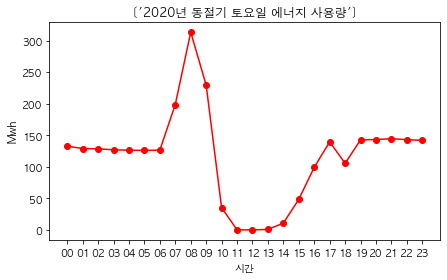

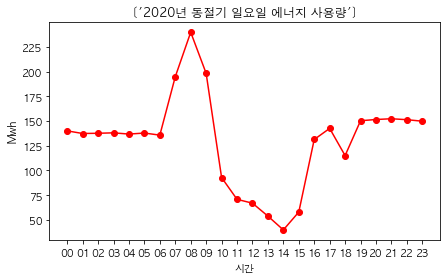

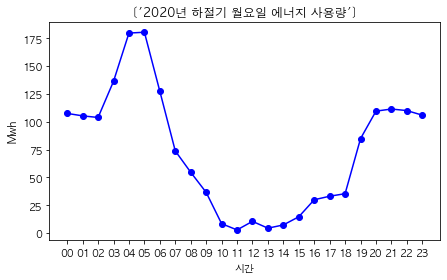

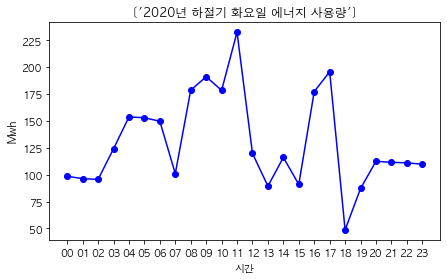

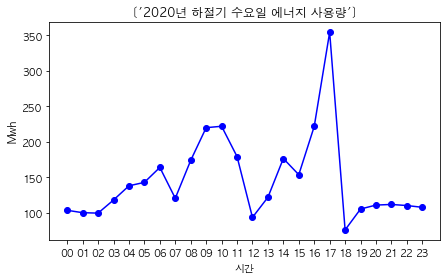

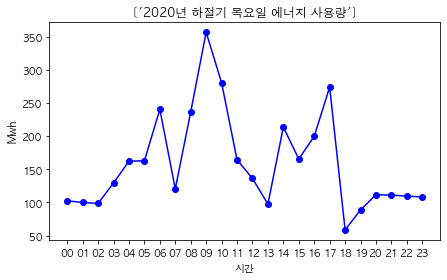

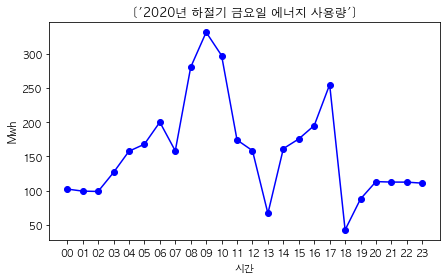

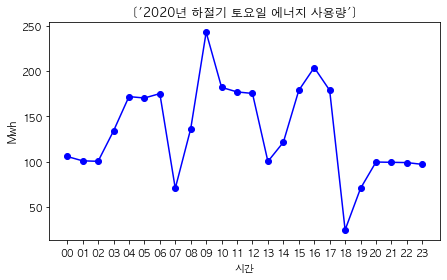

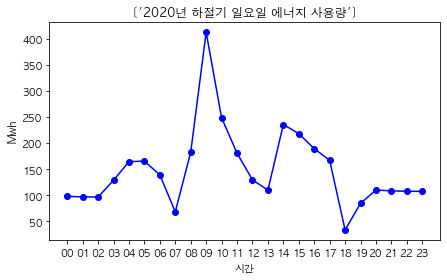

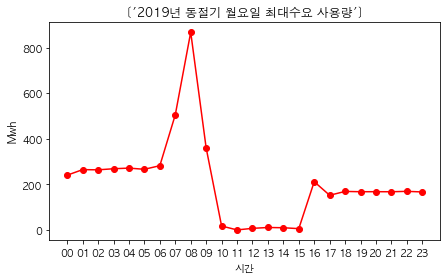

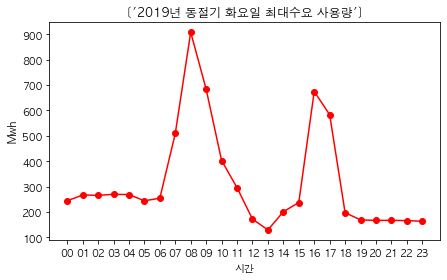

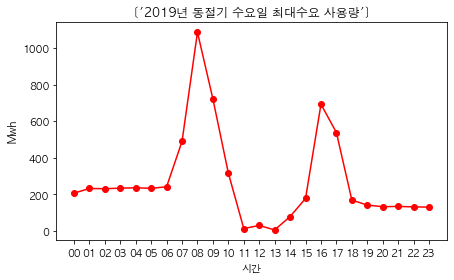

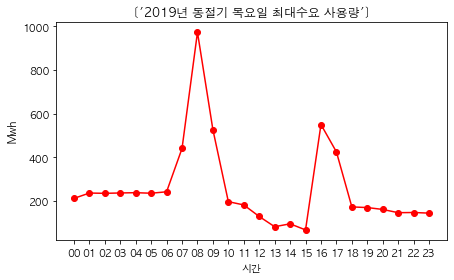

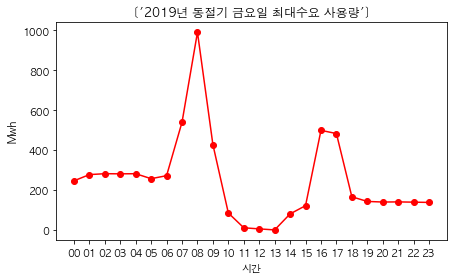

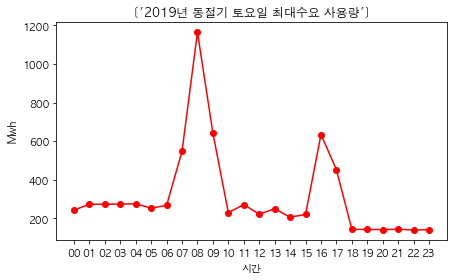

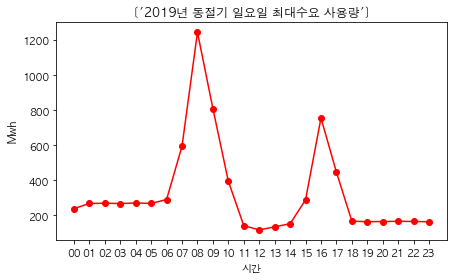

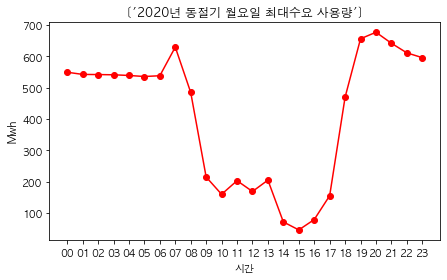

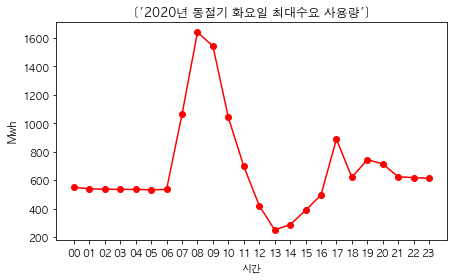

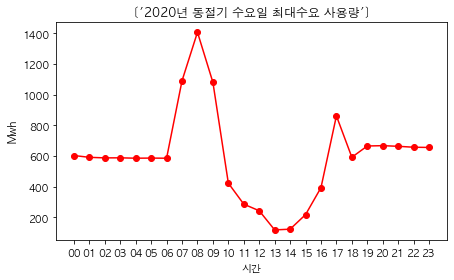

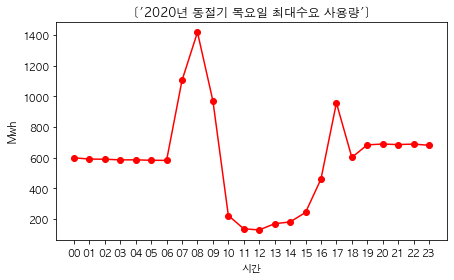

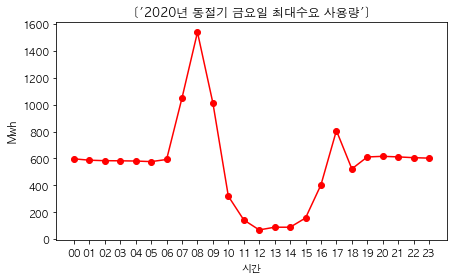

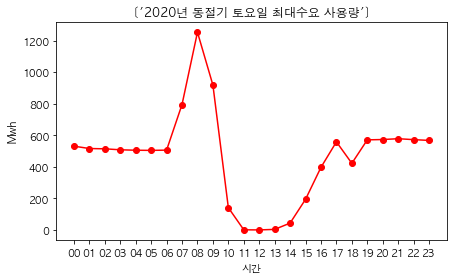

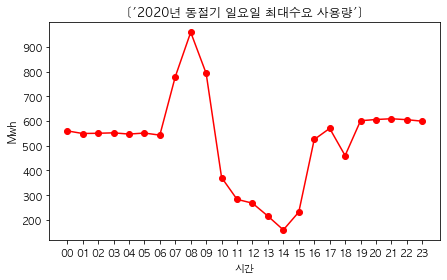

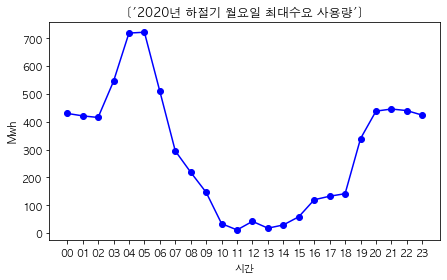

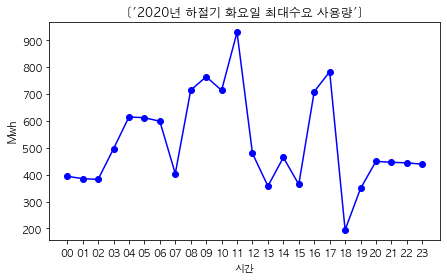

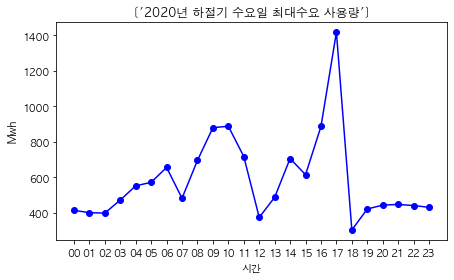

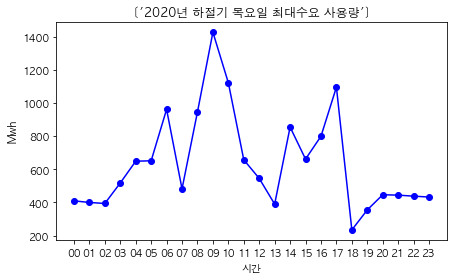

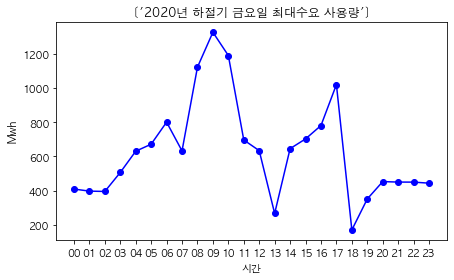

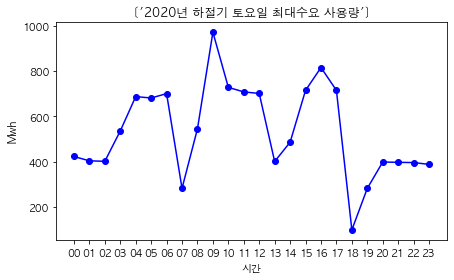

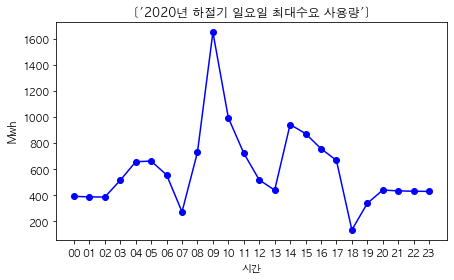

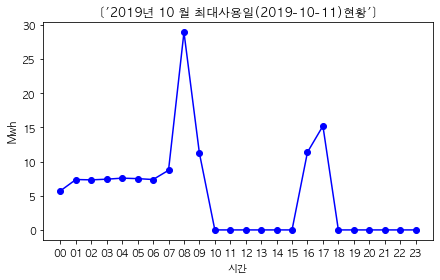

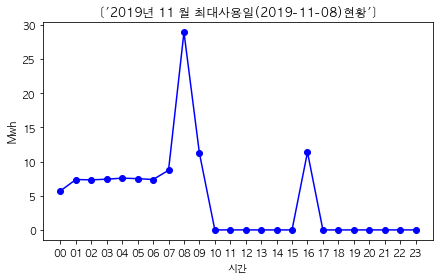

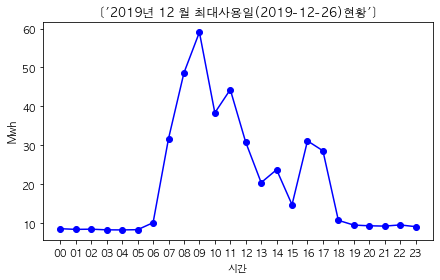

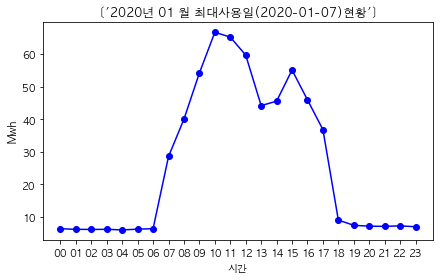

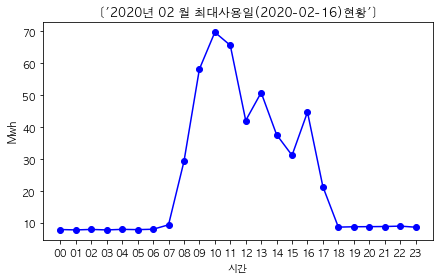

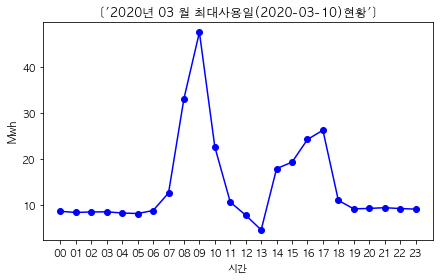

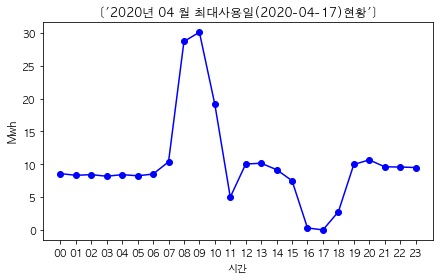

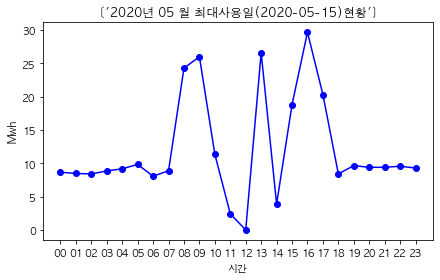

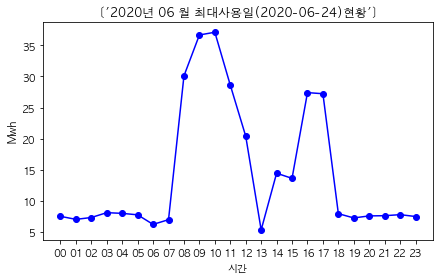

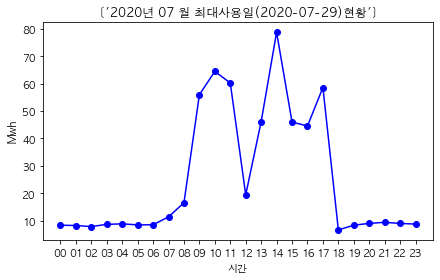

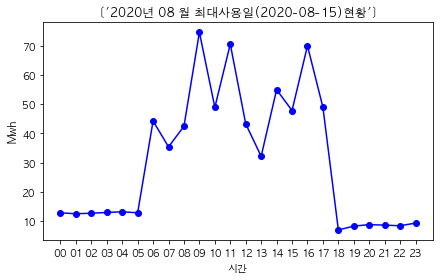

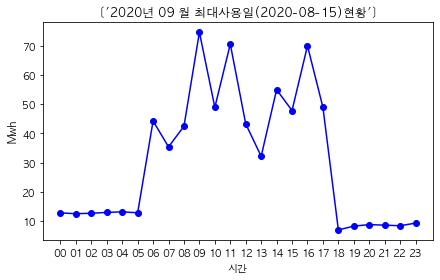

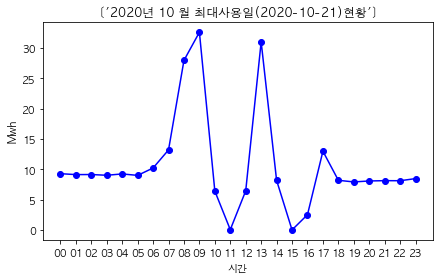

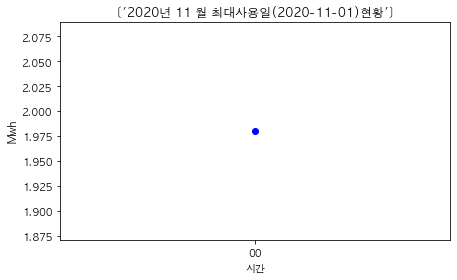

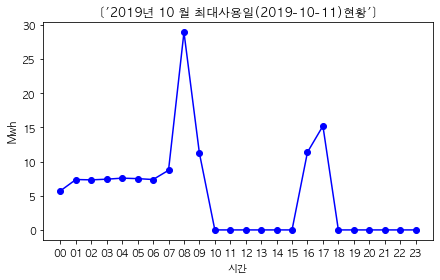

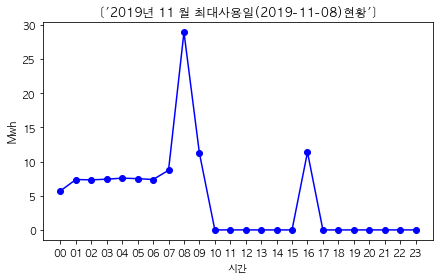

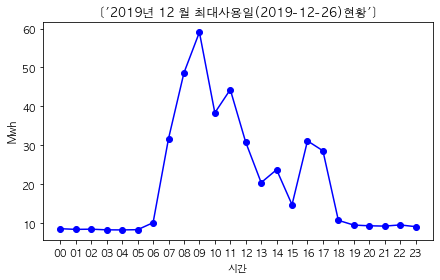

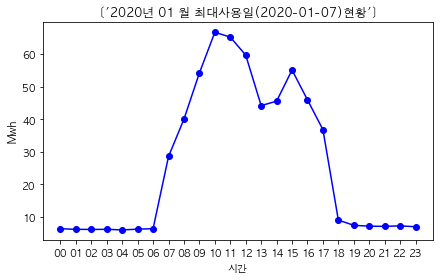

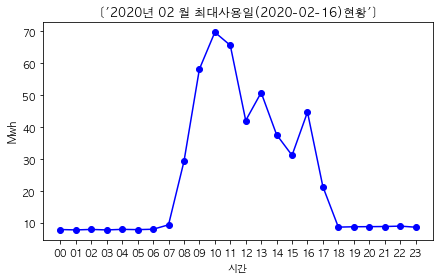

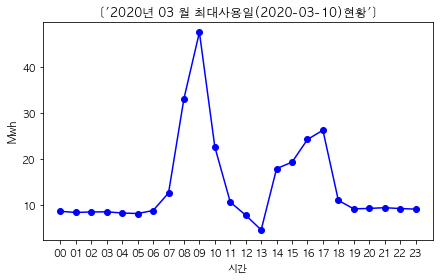

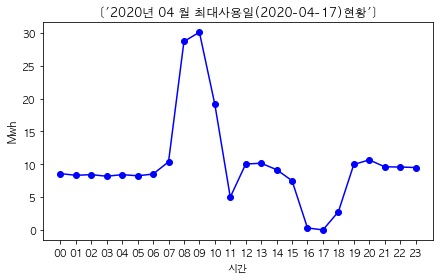

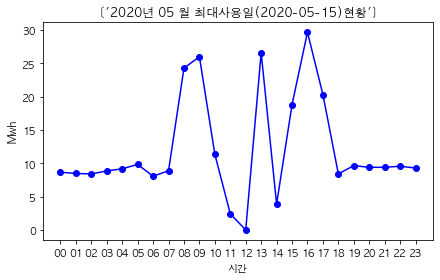

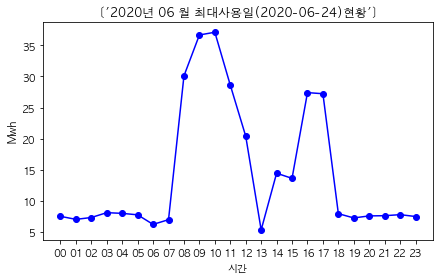

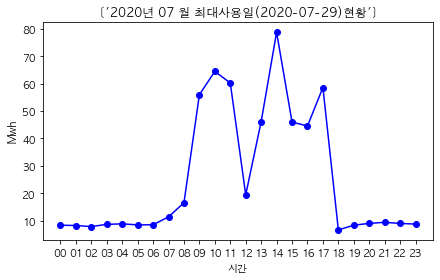

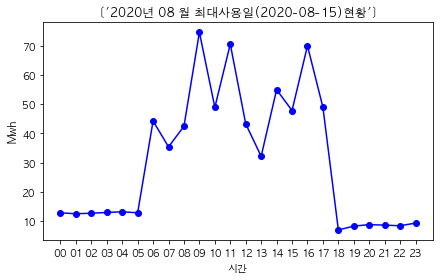

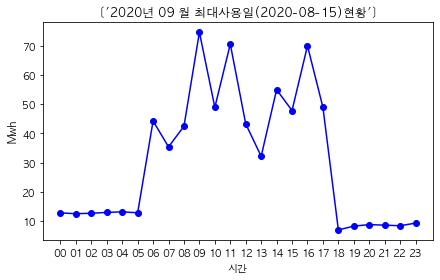

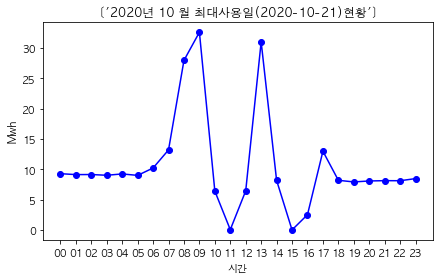

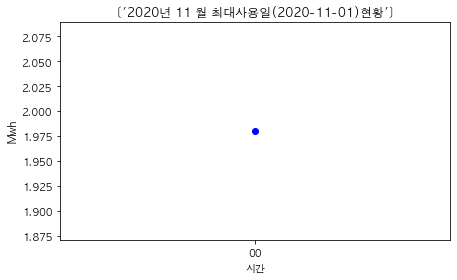

In [25]:
title_1_1 = '5. {} 개년 통합 전력 분석'.format(year_range)
title_1_2 = '6. 전력 데이터 통계분석'
title_1_2_1 = ' 6.1 히스토그램'
title_1_2_2 = ' 6.2 박스플롯'
title_1_2_3 = '6.3 {}개년 월별 통합 분석'.format(year_range)
title_1_2_4 = '6.4 {}최대 전력 사용량 분석'.format(year_range)
title_1_3 = '7. {}년전 월별 통합 분석'.format(year_range-1)
title_1_3_1 = '7.1 {}년 Usage 기반 월별 분석'.format(year_range)
titie_1_4_1 = '8. 동절기/하절기 데이터 분석'

title_2 = '9. 용도별 전력 분석'
document = Document()
document.add_heading(title_1_1,1)
document.add_paragraph('- 년간 전력 사용그래프')
document.add_picture('./images/total_year_usage.png')
document.add_paragraph('- 년간 전력 사용표')
table_1 = document.add_table(rows = year_range+2, cols = 3)
table_1.style = document.styles['Table Grid']
table_1.cell(0,0).merge(table_1.cell(1,0))
table_1.cell(0,1).merge(table_1.cell(0,2))
table_1.cell(0,0).text = '구분'
table_1.cell(0,1).text = '전력사용량'
table_1.cell(1,1).text = '사용량[toe]'
table_1.cell(1,2).text = '사용금액[백만원]'

for i in range(ismart.year.unique().size):
    year = ismart.year.unique()[i]
    usage = ismart[ismart.year==year].usage.sum()
    table_1.cell(i+2,0).text = '{}년'.format(year)
    table_1.cell(i+2,1).text = format(round(usage,2),',')


document.add_heading(title_1_2,1)
document.add_heading(title_1_2_1,1)
document.add_picture('./images/year_hist_usage.png')
document.add_heading(title_1_2_2,1)
document.add_picture('./images/year_boxplot_usage.png') 
document.add_heading(title_1_2_3,1)
document.add_paragraph('- 월별 전력 사용그래프')
document.add_picture('./images/year_total_usage.png')
document.add_paragraph('- 월별 전력 사용표')
table_2 = document.add_table(rows = year_range+2, cols = 14)
table_2.style = document.styles['Table Grid']
table_2.cell(0,0).text = '구분'
table_2.cell(0,1).text = '1월'
table_2.cell(0,2).text = '2월'
table_2.cell(0,3).text = '3월'
table_2.cell(0,4).text = '4월'
table_2.cell(0,5).text = '5월'
table_2.cell(0,6).text = '6월'
table_2.cell(0,7).text = '7월'
table_2.cell(0,8).text = '8월'
table_2.cell(0,9).text = '9월'
table_2.cell(0,10).text = '10월'
table_2.cell(0,11).text = '11월'
table_2.cell(0,12).text = '12월'
table_2.cell(0,13).text = '합계'
table_2.cell(ismart.year.unique().size+1,0).text = '합계'

for i in range(13):
    for j in range(len(year_monthly_usage.index)):
                   table_2.cell(j+1,i+1).text = \
            str(round(float(year_monthly_usage.iloc[year_monthly_usage.index==year_monthly_usage.index[j],i]),2))

for i in range(len(year_monthly_usage)):
    table_2.cell(i+1,0).text = year_monthly_usage.index[i]

for i in range(13):
    table_2.cell(ismart.year.unique().size+1,i+1).text = format(round(colsum[i],2),',')
    
document.add_heading(title_1_2_4,1)
table_3 = document.add_table(rows = year_range+2, cols = 14)
table_3.style = document.styles['Table Grid']
table_3.cell(0,0).text = '구분'
table_3.cell(0,1).text = '1월'
table_3.cell(0,2).text = '2월'
table_3.cell(0,3).text = '3월'
table_3.cell(0,4).text = '4월'
table_3.cell(0,5).text = '5월'
table_3.cell(0,6).text = '6월'
table_3.cell(0,7).text = '7월'
table_3.cell(0,8).text = '8월'
table_3.cell(0,9).text = '9월'
table_3.cell(0,10).text = '10월'
table_3.cell(0,11).text = '11월'
table_3.cell(0,12).text = '12월'
table_3.cell(0,13).text = '합계'
table_3.cell(ismart.year.unique().size+1,0).text = '합계'

for i in range(13):
    for j in range(len(year_monthly_usage.index)):
                   table_3.cell(j+1,i+1).text = \
            str(round(float(year_monthly_maxdemand.iloc[year_monthly_maxdemand.index==year_monthly_maxdemand.index[j],i]),2))

for i in range(len(year_monthly_usage)):
    table_3.cell(i+1,0).text = year_monthly_usage.index[i]

for i in range(13):
    table_3.cell(ismart.year.unique().size+1,i+1).text = format(round(colsum_maxdemand[i],2),',')
    
#document.add_paragraph('최대전력 사용량 peak치가 가장 큰 달은 {0}월이며 사용량은 {1}  입니다.'.format('07',peak_value))

document.add_heading(title_1_3,1)



i = 0
while i < year_range:
    title1 = '3.1 {}년 Usage기반 월별분석'.format(years[i])
    title2 = '  2){}년 월별 생산량 및 전기 사용 현황'.format(years[i])
    document.add_heading(title1)
    document.add_paragraph(title2)
    
    
    make_elec(years[i],"usage")
    document.add_picture("./images/year_hist_usage.png")
    table = document.add_table(rows = 2, cols = 14)
    table.style = document.styles['Table Grid']
    table.cell(0,0).text = str(years[i])
    table.cell(0,1).text = '1월'
    table.cell(0,2).text = '2월'
    table.cell(0,3).text = '3월'
    table.cell(0,4).text = '4월'
    table.cell(0,5).text = '5월'
    table.cell(0,6).text = '6월'
    table.cell(0,7).text = '7월'
    table.cell(0,8).text = '8월'
    table.cell(0,9).text = '9월'
    table.cell(0,10).text = '10월'
    table.cell(0,11).text = '11월'
    table.cell(0,12).text = '12월'
    table.cell(0,13).text = '합계'
    table.cell(1,0).text = '전력사용량\n[MWh]'

    monthly_use = year_monthly_usage[year_monthly_usage.index == years[i]]
    for cell in range(13):
        table.cell(1,cell+1).text = str(round(monthly_use.iloc[0,cell],2))
    
      
    document.add_heading('{}년 demand_max기반 월별분석'.format(years[i]),1)
    document.add_paragraph('2){}년 월별 생산량 및 전기 사용 현황'.format(years[i]))
   
    make_elec(years[i],"max_usage")
    document.add_picture("./images/year_hist_usage.png")
    
    monthly_maxuse = year_monthly_maxdemand[year_monthly_maxdemand.index==years[i]]
    
    table1 = document.add_table(rows = 2, cols = 14)
    table1.style = document.styles['Table Grid']
    table1.cell(0,0).text = str(years[i])
    table1.cell(0,1).text = '1월'
    table1.cell(0,2).text = '2월'
    table1.cell(0,3).text = '3월'
    table1.cell(0,4).text = '4월'
    table1.cell(0,5).text = '5월'
    table1.cell(0,6).text = '6월'
    table1.cell(0,7).text = '7월'
    table1.cell(0,8).text = '8월'
    table1.cell(0,9).text = '9월'
    table1.cell(0,10).text = '10월'
    table1.cell(0,11).text = '11월'
    table1.cell(0,12).text = '12월'
    table1.cell(0,13).text = '합계'
    table1.cell(1,0).text = '전력사용량\n[MWh]'

    
    for cell in range(13):
        table1.cell(1,cell+1).text = str(round(monthly_maxuse.iloc[0,cell],2))
    
    i = i + 1


document.add_heading(titie_1_4_1,1)
document.add_heading('동절기/하절기 요일별 전력사용량 분석')
i = 0
while i < year_range:
    year = years[i]
    season_usage_graph(str(year))
    i = i+1

document.add_heading('동절기/하절기 요일별 최대수요분석')
i = 0
while i < year_range:
    year = years[i]
    season_max_graph(str(year))
    i = i+1

document.add_heading('5. {}개년 최대 사용월의 일별 데이터 분석'.format(year_range),1)
i = 0
while i < year_range:
    year = years[i]
    day_usage_graph(str(year))
    i= i+1

i = 0
while i < year_range:
    year = years[i]
    day_max_usage_graph(str(year))
    i= i+1


# 2.2  1 장 일반 현황
## 2.2.1  3. 시설 현황¶
### 2.2.2  4. 에너지 원단위 현황

In [26]:
document.add_heading('3. 시설현황',       level = 1) 
document.add_heading('3.1 수전 전력 현황', level = 2)
data = pd.DataFrame(ch1_3_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('3.2 변압기 현황', level = 2)
data = pd.DataFrame(ch1_3_2) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('3.3 주요 전력 설비 현황', level = 2)
data =pd.DataFrame(ch1_3_3)
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('3.4 주요 열 설비 현황', level = 2)
data =pd.DataFrame(ch1_3_4)
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('3.5 조명 설비 현황', level = 2)
data =pd.DataFrame(ch1_3_5)
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('4. 에너지원단위 현황', level = 1)
data = pd.DataFrame(ch1_4)
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

## 2장 진단 결과

In [27]:
document.add_heading('2장. 진단 결과 종합', level = 0)
document.add_heading('1. 진단수행범위',       level = 1)
document.add_heading('1.1 적용 기준', level = 2)
document.add_heading('1.1.1 에너지 사용 현황', level = 3)
paragraph = document.add_paragraph('에너지 사용현황 자료는 부산대학교에서 제시한 자료 및 수치를 기준으로 하였으며, 개별 설비의 에너지 사용량은 실측 또는 제시 자료를 적용하였다.')
paragraph = document.add_paragraph ('당해년도 연간 에너지 사용량')
paragraph = document.add_paragraph('전력 : 163.69 [MWh/년](37.65[toe/년])')
paragraph = document.add_paragraph('연료(LNG) : 10.03  [천N㎥/년] (10.46[toe/년])')
paragraph = document.add_paragraph('전체 :  48.11[toe/년])')

document.add_heading('1.1.2 에너지 단가', level = 3)
paragraph = document.add_paragraph('부산대학교에서 제시한 자료를 기준으로 연 평균하여 적용하였다')
paragraph = document.add_paragraph ('- 전력단가 (13년 전력사용량 및 금액의 산술평균 기준) : 108.9[원/kWh] (VAT제외)')
paragraph = document.add_paragraph('- 연료(LNG)단가 (13년 사용량 및 금액의 산술평균 기준) : 927.9[원/N㎥] (VAT제외)')

document.add_heading('1.1.3 연간 가동시간', level = 3)
paragraph = document.add_paragraph('- 수전설비 가동시간 : 8,760[h/년]')
paragraph = document.add_paragraph ('- 가동시간은 24[시간/일], 365[일/년]가동 중이므로 부산대학교에서 제시한 시간을 적용하였다.')
paragraph = document.add_paragraph('- 열설비 가동시간: 5,800 [h/년]')

document.add_heading('1.1.4 설비 투자비', level = 3)
paragraph = document.add_paragraph('1) 설비 제작업체 및 물가자료의 참조')
paragraph = document.add_paragraph ('2) 타 업체에 설치된 설비 투자비 적용')
paragraph = document.add_paragraph('3) 투자비용 중 경비, 기업 관리비용 및 이윤은 제외됨')

document.add_heading('1.1.5 투자의 경제성 간이 자본 회수법 적용(이자율 제외) 투자비 회수 기간은 단순 회수기간 적용', level = 3)
document.add_heading('1.1.6 자료', level = 3)
paragraph = document.add_paragraph('모든 자료는 진단기간 중 측정된 온도, 압력, 유량 전력 분석치 등을 기준으로 삼았으며, 측정곤란 또는 불능 조건의 자료는 설계기준치 또는 이론적 근거 및 현장 근무자의 제시치, 동종업체와의 비교분석 등을 통하여 판단한 운전 기준 을 활용하였다.')
document.add_heading('1.1.7 1.1.7 기대효과 계산', level = 3)
document.add_heading('2. 기대효과 종합',       level = 1)

document.add_heading('2.1 진단 개요' , level = 2)
paragraph = document.add_paragraph('금번 실시한 에너지 진단결과 건축물 에너지 효율등급의 등급기준은 3등급으로 조사되었다. 노후화된 건물의 에너지사용량 을 절감하고 온실가스 저감을 위해 여러 개선방안을 제시하였다.')
data = pd.DataFrame(ch2_2_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('2.2 진단 목적', level = 2)
paragraph = document.add_paragraph('본 과업은 산업통상자원부 고시 ‘ 공공기관 에너지이용합리화 추진에 대한 규정’ 및 ‘공공기관 에너지진단 운용규정(에너지 관리공단)에 기초하여 학내 시설물 에너지 이용 실태와 손실 파악을 통해 편익을 극대화할 수 있는 최적의 개선방안을 제시 하고자 하며 이후 리모델링 시설 사업 추진 시 에너지 효율 향상을 위한 자료로 활용하고 본질적으로는 에너지 절감과 온실 가스 감축에 기여하는 데 그 목적이 있다.')
document.add_heading('2.3 진단 요약', level = 2)
document.add_heading('2.3.1 건축 창호 단열', level = 3)
paragraph = document.add_paragraph ('현재 건물 외부 창호의 전체면적은 744.6㎡ 이며, 6mm 2장으로 된 투명복층유리로 설치되어 있다. 투명복층유리는일사량이 그대로 열부하로 발생하는 단점이 있으며, 샤시 부분의 노후화로 인해 단열이 필요하다.이를 단열하기 위해 하이샤시 및 로e 이중창으로 교체를 한다. 이를 개선한다면 차폐계수, 열관류율 및 창문 틈새 바람에 의한 효과로 5.25[toe/년](전력:8,365[kWh/년], 연료:3,188[N㎥/년])이 절감된다. 2013년 에너지사용단가 기준으로 약 3,869 [천원/년]이 절감되고, 투자비 333,361[천원/년], 투자비 회수기간은 86.2[년]이 걸릴 것으로 예 상된다.')
document.add_heading('2.3.2 건축 벽체 단열 보강', level = 3)
paragraph = document.add_paragraph('현재 건물의 전체벽체 면적은 1,441.8㎡ 이며, 외벽의 두께는 콘크리트 350mm + 드라이피트 50mm로 총 400mm 이다. 콘크리트 단일 설치보다는 단열이 잘 되는 편이지만, 열반사 보온 단열재에 비하여 냉난방비의 절감이나 효과 등에 미치지 못한다. 단열의 효율을 높이고 냉난방비의 절감을 위해서 실내외에 단열공사를 실시한다.')
paragraph = document.add_paragraph('- 1단계: 내,외부단열(드라이피트 50mm 추가)')
paragraph = document.add_paragraph('- 2단계: 외부 인테리어 공사(화강석) 이를 개선한다면 열관류율의 절감에 따라 0.56[toe/년](전력:887[kWh/년],연료:338[N㎥/년])이 절감된다. 2013년 에너지사용단가 기준으로 1단계의 경우 절감금액 305[천원/년], 투자비는 155,168[천원/년], 투자비 회수기간은 508.75[년]이 걸릴 것으로 예상되며, 2단계의 경우 절감금액 411[천원/년]. 투자비 275,931 [천원], 투자비 회수기 간은 671.36[년]으로 예상된다.')

document.add_heading('2.3.3 현관문을 이중문으로 교체', level = 3)
paragraph = document.add_paragraph('현재 건물은 사람의 출입이 잦아 우측문이 자주 열려있고, 문의 개폐횟수가 많다. 현관문을통해 흡입된 공기가 냉 난방된 공기의 열량을 뺏음으로써 연돌효과가 생겨 에너지 손실이 생기게 된다. 이중문을 설치하게 되면 앞쪽의 문 이 열리더라도 뒤쪽의 문이 공 공기의 출입을 가로막음으로써 공기의 출입을 줄일 수 있어 에너지손실을 줄이는데 효과적이다.이를 개선한다면 열관류율 및 온도차에 의한 냉난방 열손실 절감에 따라 5.97[toe/년](연료:5,727[N㎥/년])) 이 절감되며, 2013년 에너지사용단가 기준으로 약 5,314 [천원/년]이 절감되고, 투자비 40,000[천원/년], 투자비 회 수기간은 7.5[년]이 걸릴 것으로 예상된다.')

document.add_heading('2.3.4 천정텍스 설치 및 옥상차열도료', level = 3)
paragraph = document.add_paragraph('도포 현재 옥상의 전체바닥 면적은 2,850㎡ 이며, 콘크리트 300mm로 설치되어 있다. 또한 외부에 일반페인트로 마감이 되어 있고, 최상층의 지붕에는 천정텍스가 설치되어 있지 않다. 건물의 크랙 및 방수의 노후화로 인해 누수 등의 문제 가 발생되며, 옥상의 열관류율이 높아 열손실이 발생하고 있다.')

paragraph = document.add_paragraph('이를 개선하기 위해 옥상의 방수층을 재시공한 뒤, 차열도료를 도포하고, 최상층에 천정텍스를 시공한다. 이를 개선 시 열관류율 및 온도차에 의한 냉난방 열손실 절감에 따라 2.71[toe/년](전력:4,285[kWh/년],연료:1,656[N㎥/년]) 이 절감되며, 2013년 에너지사용단가 기준으로 약 2,003 [천원/년]이 절감되고, 투자비 56,114 [천원/년], 투자비 회수기간은 28.0[년]이 걸릴 것으로 예상된다.')

document.add_heading('2.3.5 흡수식 냉온수기 시스템 에어컨으로 교체' , level = 3)
paragraph = document.add_paragraph('현재 흡수식냉온수기와 개별적 냉난방기가 함께 사용되고 있으며, 이로 인해 에너지소비가 증가되고 있다. 흡수식냉 온수기의 불완전 연소가 발생하고, 배관의 노후화 및 에너지의 이중 소비로 인하여 냉난방의 효율이 낮게 나타난다. 에너지의 이중 소비를 막기 위해 하나의 시스템으로 검토하면, 기존 흡수식냉온수기의 노후화 및 에너지단가를 비교 하여 볼 때, 시스템 에어컨으로 냉난방 설비를 교체하는 것이 가장 효율적이며 적은 비용이 발생한다.')                 
paragraph = document.add_paragraph('시스템 에어컨으로 냉난방 시스템을 개선하면 10.95[toe/년](전력:-863[kWh/년],연료 : 10,690 [N㎥/년])이 절감되 며, 2013년 에너지사용단가 기준으로 약 8,652[천원/년]이 절감되고, 투자비 225,250[천원/년], 투자비회수기간은 26.0[년]이 걸릴 것으로 예상된다.')

document.add_heading('2.3.6 LED형 조명으로 교체', level = 3)
paragraph = document.add_paragraph('현재 화장실 및 계단에 소량의 다운라이트를 제외하고 주로 형광등을 사용하고 있다. 형광등은 LED에 비하여 수명 이 짧고, 효율이 낮아 유지비가 많이 발생한다. 기존조명을 교실은 1,200x300, 복도는 600x300의 LED로 교체하며, 이는 에너지 소모량을 줄일 뿐 아니라 인테리어 미관상으로도 기대를 할 수 있다.')
paragraph = document.add_paragraph('LED 조명으로 교체할 시 5.46 [toe/년](전력:23,760[kWh/년])이 절감되며, 2013년 에너지사용단가 기준으로 약 2,587 [천원/년]이 절감되고, 투자비 61,554[천원/년], 투자비 회수기간은 23.8[년이 걸릴 것으로 예상된다.')


document.add_heading('2.3.7 멀티탭을 체크탭으로 교체', level = 3)
paragraph = document.add_paragraph('본 건물의 특성상 컴퓨터 및 각종 기기의 사용으로 인해 멀티탭의 수량이 많다. 컴퓨터의 대기전력으로 인한 전력소 모는 컴퓨터의 사용대수가 많은 만큼 그에 비례하여 많이 발생하고 있다. 체크탭은 대기전력 차단기능이 크며, 컴퓨 터를 켜놓고 사용하지 않는 시간이 많으면 많을수록 전력 절감량도 늘어나게 된다.')
paragraph = document.add_paragraph('컴퓨터의 멀티탭을 체크탭으로 교체하고, 표본 PC의 절전율을 기준으로 에너지 절감량을 계산하면 4.78[toe/년] (전력:20,769[kWh/년])이 절감된다. 2013년 에너지사용단가 기준으로 약 2,262 [천원/년]이 절감되고, 투자비는 225,250[천원/년], 투자비 회수기간은 26.0[년]이 걸릴 것으로 예상된다.')

document.add_heading('2.4 진단결과종합', level = 2)
paragraph = document.add_paragraph('위의 개선방안이 모두 개선된다면 가장 최선이 되겠지만, 1등급의 에너지 효율등급을 받기 위해서 건축부분(창호단열, 옥상의 차열도료 도포)과 설비부분(흡수식냉온수기의 시스템에어컨교체, LED조명교체)으로 4가지의 방안이 개선되어야 1등급의 에너 지 효율등급을 받을 수 있을 것으로 보인다.')
data = pd.DataFrame(ch2_2_4) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

## 3장 세부 개선 사항

In [28]:
document.add_heading('3장. 세부 개선 사항', level = 0)

##################################       1. 건축 창호 단열     ##############################
document.add_heading('1. 건축 창호 단열',       level = 1)
document.add_heading('1.1 사용 현황', level = 2)
paragraph = document.add_paragraph('1) 제2교수연구동은 위에서 보면 ㄱ자모양 1개의 건물로 구성되어 있으며, 건물외부 창호전체면적은 744.6㎡의 규모로 구 성되어 있다.')
paragraph = document.add_paragraph('2) 현장에 설치된 창문의 종류는 투명복층유리로써 6mm+6mm의 두장의 유리로 되어있다')
paragraph = document.add_paragraph('3) 아래 표는 제2교수연구동의 전체 창문 현황이다')

data = pd.DataFrame(ch3_1_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

document.add_heading('1.2 문제점', level = 2)
paragraph = document.add_paragraph('1) 건물이 ㄱ자형의 건물로서 동남향으로써 정확한 향의 구분이 어려우나 태양열이 발생하는 시간대는 비슷하게 나타난다')
paragraph = document.add_paragraph('2) 창의 개수는 현장에서 확인하고 산정하였으므로 4층 건물로 외부 부하발생 부위만 구분하여 산정하였다.')
paragraph = document.add_paragraph('3) 창문은 투명복층유리로써 일사량이 그대로 실내에 열부하로 발생하므로 냉방부하로 발생한다')
paragraph = document.add_paragraph('4) 알루미늄 샤시부분이 노후화 되어 부식되어 틈새에 부하가 많이 발생하고 있다.')
paragraph = document.add_paragraph('5) 알루미늄 샤시부분의 열전달율이 떨어져서 실내의 냉난방열이 외부로 열전달되어 손실이 발생한다')
document.add_heading('1.3 개선방안', level = 2)
paragraph = document.add_paragraph('1) 높은 단열효과를 가지고 냉난방부하를 절감시키는 제품으로 단열바인 하이샤시를 선정한다.')
paragraph = document.add_paragraph('2) 여름철에는 실내로 유입되는 태양열의 적외선을 로이2중창으로 하여 80%이상 차단하여 실내의 적정온도를 유지시켜 실 내 온도를 빼앗기지 않도록 고효율 제품을 선정한다.')
paragraph = document.add_paragraph('3) 겨울에 유리창으로 투과되는 차가운 냉기를 막아주고, 실내의 난방열이 유리면을 통해 밖으로 빠져 나감현상을 막아주어 난방효과를 증대시킨다.')
paragraph = document.add_paragraph('4) 시스템창으로써 2충창으로 외부에는 로이이중창으로 18mm로 하고 내부에는 16mm창으로 선정하고, 에너지효율 1등급 창호의 사용으로 에너지절감량을 산정한다.')
document.add_heading('1.4 기대효과', level = 2)
document.add_heading('1.4.1 차페계수에 의한 에너지 절감량', level = 3)
paragraph = document.add_paragraph('계절별 시간대별의 열량을 계산하여 하절기에는 차단되는 열량을 계산하여 실내에너지를 빼앗기지 않도록 계산한다.')
paragraph = document.add_paragraph('계산 기준 : - 냉,난방실내 기준 온도 : 26, 20℃')
paragraph = document.add_paragraph(' 유리창의 일사량(kcal/h,㎡) 북위37도, 7월말 기준')

data = pd.DataFrame(ch3_1_4a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
paragraph = document.add_paragraph('유리창을 통과하는 태양 복사열이 전부 실내 냉방부하가 되는 것이 아니고 복사열의 일부가 벽에 일단 흡수되어 축열부하 를 고려한 축열계수를 적용해여야 한다. 그러나 생략해도 무방해서 계산에서 제외한다')
paragraph = document.add_paragraph('동쪽의 일사량은 6시부터 10시까지가 최대치이며 평균을 나타내면 : 398.4 kcal/h,㎡ 남쪽의 일사량은 11시부터 13시까지가 최대치이며 평균을 나타내면 : 137.7 kcal/h,㎡ 서쪽의 일사량은 14시부터 18시까지가 최대치이며 평균을 나타내면 : 398.4 kcal/h,㎡')
paragraph = document.add_paragraph('차폐전 유리의 복사 침입열량 계산 계산식 : Qg = Lg x Ks x A x S Lg : 유리창의 평균 일사량')

paragraph = document.add_paragraph('Ks : 차폐계수 0.74(12mm일반투명유리)')
paragraph = document.add_paragraph('A  : 침입유리 단면적')
paragraph = document.add_paragraph('S  : 일조량(70%)')
paragraph = document.add_paragraph('로이유리 와 이중창 적용후 유리의 복사 침입열량 계산 계산식 :  Qg =  Lg x Ks  x A')
paragraph = document.add_paragraph('Lg : 유리창의 평균 일사량')
paragraph = document.add_paragraph('Ks : 차폐계수 0.38(6mm일반유리+ 6mm아르곤주입 + 6mm로이유리, 5mm일반유리+ 6mm아르곤 주입 + 5mm일반유리)')
paragraph = document.add_paragraph('A  : 침입유리 단면적, S  : 일조량(70%)')
 
document.add_heading('차폐 전, 후 대비 복사열의 침입감소 열량', level = 4)

data = pd.DataFrame(ch3_1_4b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
paragraph = document.add_paragraph('연간 가스절감량 하절기때가 일사열에 의한 차단열의 에너지 절감이 많이 이루어지므로 하절기의 에너지절감량을 적용하고 동절기는 실내에 에너지를 공급하므로 부하에 적용치 않음')
paragraph = document.add_paragraph('냉방시 절감열량 = 냉방용량 [kcal/h] x 냉방사용시간 (4개월x25일x2시간) = 6,846,212 [kcal/년]')
paragraph = document.add_paragraph('연간 절감 가능한 연료량 (총 에너지사용량 대비 연료사용량 비율 : 80.7%) 절감가능 열량 ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%))')
paragraph = document.add_paragraph('= 5,524,893 [kcal/년] ÷ (9,420 [kcal/Nm³] x 90%) = 651.7 [Nm³/년]')
paragraph = document.add_paragraph('연간 절감 가능한 전력량 (총 에너지사용량 대비 전력사용량 비율 : 19.3%) 절감가능' )
paragraph = document.add_paragraph('열량 ÷ (전기 발열량x시스템 냉난방기의 평균 효율(90%))')
paragraph = document.add_paragraph('= 1,321,319 [kcal/년] ÷ (860 [kcal/kWh] x 90%) = 1,707.1 [kWh/년]')

document.add_heading('연간 연료 절감금액', level = 4)
paragraph = document.add_paragraph('연간가스절감량 [Nm³/년] x 연료단가 [원/Nm³]')
paragraph = document.add_paragraph('= 651.7 [Nm³/년] x 927.9 [원/Nm³] = 605 [천원/년]')

document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량 [kWh/년] x 전력단가 [원/kWh]')
paragraph = document.add_paragraph('= 1,707.1 [kWh/년] x 108.9 [원/kWh] = 186 [천원/년]')

document.add_heading('연간 에너지 절감금액 연간 연료 절감금액 + 연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('= 605 + 186 = 791 [천원/년]')

document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량 [kWh/년] x 전력단가 [원/kWh]')


document.add_heading('1.4.2 열관류율에 의한 절감량', level = 3)
paragraph = document.add_paragraph('여름철에 냉방기간에 실내의 차가운열이 외기의 더운열에 의해 열전달에 되어 실내의 온도가 높아지므로 실내의 온도와 외 기의 온도차에 의한 열손실의 계산한다.')
paragraph = document.add_paragraph('겨울철에 실내의 더운 열이 외기의 차가운열로 열전달이 발생하여 에너지손실이 발생한다')
paragraph = document.add_paragraph('외부로 열손실이 되는 열량은 로이2중창으로 설계 시 외부로 손실되는 에너지를 차단해줌으로써 실내의 온도를 유지할 수 있기에 냉난방에너지가 절감되는 방식이다.')
document.add_heading('하절기 실내온도와 외기온도 기준', level = 4)
data = pd.DataFrame(ch3_1_4c) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('동절기 실내온도와 외기온도 기준', level = 4)
#DFtoWord(ch3_1f)
data = pd.DataFrame(ch3_1_4d) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])


paragraph = document.add_paragraph('손실열량 (kcal/h) :  열관류율(kcal/㎡h℃) x 창면적(㎡) x (외기온도-실내온도)')
paragraph = document.add_paragraph('실내온도와 외기온도는 남부지방의 냉난방설계기준을 적용하며 위험율5% 적용함')
document.add_heading('창문으로 방출되는 시간당 열전달량', level = 4)
paragraph = document.add_paragraph('냉방열손실 = 손실열량 x 연간냉방시간(4개월x25일x2시간) = 5,231.79 x 200 = 1,046,358 [kcal/년] 난방열손실 ')
paragraph = document.add_paragraph('= 손실열량 x 연간난방시간(5개월x25일x2시간) = 41,383.22 x 250 = 10,345,806 [kcal/년]')
document.add_heading('전체 열손실 = 11,392,164 [kcal/년]', level = 4)
document.add_heading('연간 절감 가능한 연료량', level = 4)
paragraph = document.add_paragraph('(총 에너지사용량 대비 연료사용량 비율 : 80.7%) 절감가능 열량 ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%)')
paragraph = document.add_paragraph('= 9,147,908 [kcal/년] ÷ (9,420 [kcal/Nm³] x 90%) = 1,079.0 [Nm³/년]')
document.add_heading('연간 절감 가능한 전력량 ', level = 4)
paragraph = document.add_paragraph('총 에너지사용량 대비 전력사용량 비율 : 19.3%) 절감가능 열량 ÷ (전기 발열량 x 시스템 냉난방기의 평균 효율(90%)')
paragraph = document.add_paragraph('= 2,198,688 [kcal/년] ÷ (860 [kcal/kWh] x 90%) = 2,840.7 [kWh/년]')

document.add_heading('연간 연료 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량[kWh/년] x 전력단가[원/kWh] = 2,840.7[kWh/년] x 108.9[원/kWh] = 309[천원/년]')
document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 연료 절감금액 + 연간 전력 절감금액 = 1,001 + 309 = 1,311[천원/년]')

document.add_heading('연간 에너지 절감금액', level = 4)
paragraph = document.add_paragraph('연간 연료 절감금액 + 연간 전력 절감금액 = 1,001 + 309 = 1,311[천원/년]')

document.add_heading('1.4.3연간 창문 틈새 바람에 의한 절감량', level = 3)
paragraph = document.add_paragraph('알루미늄창의 부식과 노후화로 인한 기밀의 유지가 어려워서 창문의 틈새에 의한 바람이 많이 발생하고 있다')
paragraph = document.add_paragraph('건물의 낮은층에서는 연돌효과로 인한 틈새바람이 더욱더 발생하여 실내에 열손실이 발생하는 것을 방지하기 위해 창틀을 개선의 조치를 취한다.')
paragraph = document.add_paragraph('창틀은 장기간 사용에 의한 노후화로 틈새바람 등에 에너지손실이 많이 발생한다')
paragraph = document.add_paragraph('창문의 슬라이딩 부분에 열고 닫음에 의한 노후화로 틈새가 많이 발생하여 하이샤시를 설치하여 에너지 손실을 절감하고자 한다')

document.add_heading('창문을 통한 손실열량 산출기준', level = 4)
data = pd.DataFrame(ch3_1_4e) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

paragraph = document.add_paragraph('손실열량 (kcal/h) :  풍량(㎥/h) x 비열(0.31kcal/㎥℃) x (실내온도-외기온도) 풍속은 기상청에의한 자료로써 겨울은 11월~3월 기준이며 여름은 7월~9월 기준이다.')
paragraph = document.add_paragraph('틈새길이는 창의 전체길이를 계산하여 적용하고, 틈새간격은 0.9mm로 계산한다.')       

document.add_heading('창문틈새에서 방출되는 시간당 열손실', level = 4)
paragraph = document.add_paragraph('냉방열손실 = 손실열량x연간냉방시간(4개월x25일x2시간) = 8,898x200 = 1,779,563 [kcal/년] ')
paragraph = document.add_paragraph('난방열손실 = 손실열량x연간난방시간(5개월x25일x2시간) = 54,115x250 = 13,528,847 [kcal/년]')

document.add_heading('전체 열손실', level = 4)
paragraph = document.add_paragraph('= 15,308,410[kcal/년]')

document.add_heading('연간 절감 가능한 연료량 ', level = 4)
paragraph = document.add_paragraph('(총 에너지사용량 대비 연료사용량 비율 : 80.7%) 절감 가능열량 ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%))')
paragraph = document.add_paragraph('= 12,353,887[kcal/년] ÷ (9,420[kcal/Nm³] x 90%) = 1,457.17[Nm³/년]')

document.add_heading('연간 절감 가능한 전력량 ', level = 4)
paragraph = document.add_paragraph('(총 에너지사용량 대비 전력사용량 비율 : 19.3%) 절감가능 열량 ÷ (전기 발열량 x 시스템 냉난방기의 평균 효율(90%))')
paragraph = document.add_paragraph('= 2,954,523[kcal/년] ÷ (860[kcal/kWh] x 90%) = 3,817.2[kWh/년')
document.add_heading('연간 연료 절감금액', level = 4)
paragraph = document.add_paragraph('연간가스절감량[Nm³/년] x 연료 단가[원/Nm³] = 1,457.2[Nm³/년] x 927.9[원/Nm³] = 1,352.1[천원/년]')
document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량[kWh/년] x 전력 단가[원/kWh] = 3,817.2[kWh/년] x 108.9[원/kWh] = 416[천원/년]')
document.add_heading('연간 에너지 절감금액', level = 4)
paragraph = document.add_paragraph('연간 연료 절감금액 + 연간 전력 절감금액 = 1,352 + 416 = 1,768[천원/년]')

document.add_heading('1.4.4 창문 전체 절감량', level = 3)
data = pd.DataFrame(ch3_1_44) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

document.add_heading('1.4.5 투자비용', level = 3)

data = pd.DataFrame(ch3_1_45) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
document.add_heading('1.4.6 투자비 회수기간', level = 3)        
paragraph = document.add_paragraph('투자비 ÷ 절감금액 = 333,361 [천원] ÷ 3,869 [천원/년] = 86.2 [년]')
document.add_heading('1.4.7 온실가스(tC/년)', level = 3)
paragraph = document.add_paragraph('연료 저감량 :  예상 LNG 절감량 X LNG 탄소 배출계수 = 3.3 [toe/년] x 0.637 [tC/toe] = 2.1 [tC/년]')
paragraph = document.add_paragraph('전력 저감량 : 예상 전력 절감량 X 전력 탄소 배출계수 = 8.4 [MWh/년] x 0.1283 [tC/MWh] = 1.1 [tC/년]')
paragraph = document.add_paragraph('총 온실 가스 저감량 : 연료 저감량 + 전력 저감량 = 2.1  +  1.1 = 3.2 [tC/년]')

##################################       2. 건축 벽체 단열     ##############################

document.add_heading('2. 건축 벽체 단열',  level = 1)
document.add_heading('2.1 사용 현황', level = 2)
paragraph = document.add_paragraph('1) 제 2 교수연구동의 외벽은 콘크리트와 드라이비트로 설치되고 내부에는 일반페인트로 마감되어 사용하고 있다.')
paragraph = document.add_paragraph('2) 외벽의 콘크리트는 350mm로 설치되어 있으며 냉난방부분벽체(1,441.8㎡)가 단열보강이 되어 있지 않아서 단열 보강하 여 에너지손실을 줄이도록 한다')
document.add_heading('2.2 문제점', level = 2)
paragraph = document.add_paragraph('1) 건물은 내부에 일반 페인트로만 설치되어 있어서 일정한 온도유지가 되지 못하고 있다.')
paragraph = document.add_paragraph('2) 건물은 콘크리트로 설치되어 단열이 잘되지 못하고, 벽체 근처의 온도가 낮아 실내부하가 높게 발생한다.')
paragraph = document.add_paragraph('3) 실내의 각종기기로부터 발생하는 열은 실내 온도 상승에 도움이 되나, 건물의 단열상태가 불량하여 항상 열손실이 많이 발생한다')
document.add_heading('2.3 개선방안', level = 2)
paragraph = document.add_paragraph('1) 건물내부에 높은 단열효과를 가지고 냉난방부하를 절감시키는 제품으로 열반사단열제6t과 석고보드9.5t*2장을 선정한다.')
paragraph = document.add_paragraph('2) 석고보드단열재는 실내에 설치하고 마감은 석고보드 9.5t*2장과 일반페인트의 색상으로 하여 실내에 온도가 외부로 손실 되지 않도록 적정온도를 유지시켜 실내온도를 빼앗기지 않도록 고효율제품을 선정한다.')
paragraph = document.add_paragraph('3) 외부에는 단열재 20t를 설치하고 화강석으로 마감을 한다.')
paragraph = document.add_paragraph('4) 전체의 건물 면적 중에 일부인 1,441.8㎡의 수량 정도가 보온이 불량하여 시공을 하도록 한다.')
document.add_heading(' 개선 전 열관류율', level = 4)
data = pd.DataFrame(ch3_2_3a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

document.add_heading('개선 후 열관류율', level = 4)
data = pd.DataFrame(ch3_2_3b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('2.4 기대효과', level = 2)
paragraph = document.add_paragraph('겨울에는 외부의 차가운 냉기를 막아주고, 실내의 난방열이 벽면을 통해 밖으로 빠져나가는 현상을 막아주어 에너지손실을 줄인다.')
paragraph = document.add_paragraph('건물이 노후화 되어 열전달율을 줄임으로써 실내에 사용하는 냉난방기기의 에너지손실을 줄일 수 있을 뿐 아니라 실내를 보 콘크리트벽온하는 효과를 가지게 된다.')
paragraph = document.add_paragraph('외부단열효과를 내면서 내구성을 강화하여 난방효과를 증대시킨다.')

document.add_heading('열 관류율에 의한 절감', level = 4)
paragraph = document.add_paragraph('여름철에 냉방기간에 실내의 차가운 열이 외기의200mm더운열 에 의해 열전달에 되어 실내의 온도가 높아지므로 실내의 온도와 외기의 온도차에 의한 열손실의 계산한다.')
paragraph = document.add_paragraph('겨울철에 실내의 더운 열이 외기의 차가운 열로 열전달이 발생하여 에너지손실이 발생한다.')
paragraph = document.add_paragraph('외부로 열손실이 되는 열량은 콘크리트내부의 단열과 외부의 단열에 의해 손실되는 에너지를 차단하여줌으로써 실내의 온도를 유지할 수 있기에 냉난방에너지가 절감되는 방식이다.')

document.add_heading('2.4.1 개선에 의한 절감량 산정', level = 3)
document.add_heading('계산기준:하절기 절감열량', level = 4)
data = pd.DataFrame(ch3_2_41a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
         table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('계산기준:동절기 절감열량', level = 4)
data = pd.DataFrame(ch3_2_41b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

paragraph = document.add_paragraph('손실열량 (kcal/h) :  열관류율(kcal/㎡h℃) x 창면적(㎡) x (외기온도-실내온도) 하절기의 실내온도와 외기온도는 측정된 자료의 기준을 적용함.')
paragraph = document.add_paragraph('동절기의 실내온도와 외기온도는 남부지방의 냉난방설계기준을 적용하며 위험율 5%적용함.')
                                   
document.add_heading('벽체로 방출 되는 시간당 열전달량', level = 4)
paragraph = document.add_paragraph('냉방 열손실 = 손실열량 x 연간냉방시간(4개월 x 25일 x 2시간) =  1,632.71 x 200 = 326,543 [kcal/년] ')
paragraph = document.add_paragraph('난방 열손실 = 손실열량 x 연간난방시간(5개월 x 25일 x 2시간) =  12,914.70 x 250 = 3,228,674 ')
paragraph = document.add_paragraph('[kcal/년] 전체 열손실 = 326,543 + 3,228,674 = 3,555,217 [kcal/년]')                                  

document.add_heading('연간 연료 절감량 ', level = 4)
paragraph = document.add_paragraph('(총 냉난방 열량 대비 흡수식 냉온수기의 열량 비율 : 80.7%) \n 절감가능 열량 ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%))')
paragraph = document.add_paragraph('= 14,038,377[kcal/년] ÷ (9,420[kcal/Nm³] x 90%) = 1,655.9[Nm³/년]')

document.add_heading('연간 연료 절감금액', level = 4)
paragraph = document.add_paragraph('연간 가스 절감량[Nm³/년] x 연료 단가[원/Nm³] = 1,655.9[Nm³/년] x 927.9[원/Nm³]= 1,536[천원/년]')

document.add_heading('연간 전력 절감량  (총 냉난방 열량 대비 냉난방기의 열량 비율 : 19.3%)', level = 4)
paragraph = document.add_paragraph('(절감가능 열량 x  냉난방기의 열량 비율) ÷ (전기 발열량 x 냉난방기의 평균효율(90%))')
paragraph = document.add_paragraph('= 3,316,287[kcal/년] ÷ (860[kcal/kWh] x 90%) = 4,284.6[kWh/년]')

document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량[kWh/년] x 전력 단가[원/kWh] = 4,284.6[kWh/년] x 108.9[원/kWh] = 467[천원/년]')


document.add_heading('연간 에너지 절감금액', level = 4)
paragraph = document.add_paragraph('연간 연료 절감금액 + 연간 전력 절감금액 = 1,536 + 467 = 2,003 [천원/년]')

document.add_heading('2.4.2 투자비용', level = 3)
data = pd.DataFrame(ch3_4_42) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
                                   
                                
document.add_heading('2.4.3 투자비 회수기간', level = 3)
paragraph = document.add_paragraph ('투자비 ÷ 절감금액 = 275,931 [천원] ÷ 411 [천원/년] =  672.1 [년]')
document.add_heading('2.3.4 온실가스(tC/년) 저감량', level = 3)
paragraph = document.add_paragraph('연료 저감량 = 예상 LNG 절감량 x LNG 탄소 배출계수 =  0.4 [toe/년] x  0.637 [tC/toe]  =  0.2 [tC/년]')
paragraph = document.add_paragraph('전력 저감량 = 예상 전력 절감량 x 전력 탄소 배출 계수 = 0.9 [MWh/년] x 0.1283 [tC/MWh] = 0.1 [tC/년]')
paragraph = document.add_paragraph('총 온실 가스 저감량 = 연료 저감량 + 전력 저감량 = 0.2 [tC/년] + 0.1 [tC/년] = 0.3 [tC/년]')

##################################       3. 현관문을 이중문으로 교체     ##############################  

document.add_heading('3. 현관문을 이중문으로 교체',  level = 1)
document.add_heading('3.1 사용 현황', level = 2)
paragraph = document.add_paragraph('1) 현재 현관문은 사람의 출입이 잦기 때문에 우측 문이 자주 열려 있는 상태이다.')   
paragraph = document.add_paragraph('2) 문을 계폐 횟수가 높아 많은 양의 에너지가 손실되고 있다')  
paragraph = document.add_paragraph('3) 현관문으로 통해서 흡입된 공기는 현관 홀에서 냉난방된 공기의 열량을 뺏고 계단으로 연결된 곳에서 연돌 효과를 통해 상부로 다량의 공기가 배출되고 있다.')  
                                   
document.add_heading('제2교수연구동 문을 통한 손실열량 산출 현황', level = 4)                                  
data = pd.DataFrame(ch3_3_1 ) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
                                   
                                   
paragraph = document.add_paragraph('손실열량 (kcal/h) :  풍량(㎥/h) x 비열(0.288kcal/㎥℃) x (실내온도-외기온도) 풍속은 기상청에 의한 자료로써 겨울은 12월~2월의 기준이며 여름은6월~8월의 기준이다.')                            
paragraph = document.add_paragraph('외기온도는 건설교통부에 의한 설계 외기온도 자료로서 하절기 30.7(℃)기준이며 동절기 -5.3(℃)의 기준이다. ')                                   
paragraph = document.add_paragraph('풍속은 기상청에 의한 자료에다 연돌 효과에 의한 공기침입을 150%정도 감안한다.')                              

document.add_heading('3.2 문제점 및 개선방안', level = 2)
paragraph = document.add_paragraph('1) 현관문의 계폐의 횟수가 높아서 열량의 출입이 많기 때문에 에너지 손실을 줄일 수 있도록 이중 문을 사용한다')  
paragraph = document.add_paragraph('2) 현관문의 높은 계폐의 횟수를 통해서 외부공기가 출입하여 연돌 효과로 인해 현관 홀에서 머물렀다가 각 계단이나 수직 PIT로 상부로 이동하게 되어 사무실내부에도 영향을 준다.')  
                                   
document.add_heading('3.3 기대 효과', level = 2)
document.add_heading('3.3.1 개선 전 문으로 방출되는 시간당 열손실 현황', level = 3)
paragraph = document.add_paragraph('냉방열손실 = 손실열량 x 문사용률(38%) x 연간 냉방시간(3h/일 x92일) = 104,993 x 38.0% x 276 = 11,011,644[kcal/년]')
paragraph = document.add_paragraph('난방열손실 = 손실열량 x 문사용률(38%) x 연간 난방시간(3h/일 x90일) = 534,954 x 38.0% x 270 = 54,886,325[kcal/년]')
paragraph = document.add_paragraph('개선 전 전체 열손실 = 65,897,969[kcal/년]')                                                                 


document.add_heading('3.3.2 개선 후 문으로 방출되는 시간당 열손실 현황', level = 3)
document.add_heading('냉방열손실', level = 4)
paragraph = document.add_paragraph(': 손실열량 x 문사용률(10%) x 연간 냉방시간(3h/일 x92일) = 104,993 x 10.0% x 276 = 2,897,801[kcal/년]')  
document.add_heading('난방열손실', level = 4)
paragraph = document.add_paragraph(':손실열량 x 문사용률(10%) x 연간 난방시간(3h/일 x90일) = 534,954 x 10.0% x 270 = 14,443,770[kcal/년]')  
document.add_heading('개선 후 전체 열손실', level = 4)
paragraph = document.add_paragraph(': 17,341,571[kcal/년]')
document.add_heading('개선 후 전체 열손실', level = 4)
paragraph = document.add_paragraph(': 17,341,571[kcal/년]')
document.add_heading('연간 가스절감량 총 절감가능열량 ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%))', level = 4)
paragraph = document.add_paragraph(': 48,556,398[kcal/년] ÷ (9,420[kcal/Nm³] x 90.0%) = 5,727[Nm³/년]')
document.add_heading('연간 절감금액', level = 4)
paragraph = document.add_paragraph(': 연간가스절감량[Nm³/년] x 연료 단가[원/Nm³] = 5,727[Nm³/년] x 927.9[원/Nm³] = 5,314[천원/년]')

document.add_heading('3.3.3 투자 비용', level = 3)

data = pd.DataFrame(ch3_3_33) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('3.3.4 투자비 회수기간', level = 3)
document.add_heading('3.3.5 온실가스[tC/년] 저감량', level = 3)
document.add_heading('예상 LNG 절감량 x LNG 탄소 배출계수', level = 4)
paragraph = document.add_paragraph(': 5.97 [toe/년] x 0.637 [tC/toe] =  3.8 [tC/년]')

##################################       4. 천정텍스 및 옥상차열도료에 의한 절감     ##############################           
document.add_heading('4. 천정텍스 및 옥상차열도료에 의한 절감',  level = 1)
document.add_heading('4.1 사용 현황', level = 2)
paragraph = document.add_paragraph("1) 제2교수연구동의 옥상은 방수처리를 하고 외부표면에는 일반 페인트로 마감되어 있어서 열흡수율이 높게 되어 있다. \n 2) 옥상의 콘크리트는 300mm로 설치되어 있으며 전체바닥(1,263.5㎡)은 차열도료에 의한 단열보강이 되어 있지 않아서 단 열보강하여 에너지손실을 줄이도록 한다. \n 3)	최상층의 지붕에는 천정텍스가 설치되어 있지 않아서 이것을 설치하여 단열효과를 향상시킨다")
document.add_heading('4.2 문제점', level = 2)
paragraph = document.add_paragraph('1) 건물옥상은 외부에 일반페인트로만 설치되어 있어서 열관류율이 높아 실내에 열이 전달되어 열손실이 발생하고 있다. \n 2)건물옥상의 방수부분도 오래되어 누수가 발생하고, 하부의 콘크리트에 벽화현상에 의한 누수부분이 발생되어 미관을 해 친다. \n 3)건물옥상은 건물의 크랙등에 의해 방수부분이 문제가 발생되어 외부페인트가 찢어진 곳이 발생하여 조치를 해야 한다. \n 3)건물최상층 내부의 온습도를 항상 유지하려면 천정판을 설치하여 건물의 열전도가 이루어지지 않도록 해야 한다. \n 5)개선 전 건축옥상 단열상태')  
                                   
document.add_heading('4.3 개선방안', level = 2)
paragraph = document.add_paragraph('1)건물옥상의 방수층이 파괴되어 있으므로 이것을 재시공하고 그 위에 차열도료를 도포하여 근적외선을 효율적으로 차단 및 반사시켜 열에너지가 건물내부로 전달되지 않도록 해야 한다.')
paragraph = document.add_paragraph('2)태양의 빛 중에 더위를 느끼게 하는 파장인 적외선이 물질분자를 공진시켜서 발열을 하여 실내로 열이 전달되는 차열도료 는 이근적외선의 파장을 상쇄시켜고, 열전달이 일어나지 않도록 제작된 고효율제품을 선정한다.')  
paragraph = document.add_paragraph('3)차열도료는 단열도료와 달리 복사열을 방출하지 않고, 야간의 복사열에 의한 히트아이랜드현상을 방지하기 때문에 냉방 효과를 증대시킨다.') 
paragraph = document.add_paragraph('4)건물옥상은 계속적인 태양열을 받음으로써 열축적에 의한 열화현상이 빨리 발생되어 하부의 방수층까지 문제를 일으키기 때문에 태양열을 방사시켜 열전달이 발생하도록 하여 관리에 효과적으로 대처해야 한다.')
paragraph = document.add_paragraph('5)최상층의 지붕층에는 공기층과 천정판12t를 설치하여 단열효과를 상승시키고, 외부로 열손실을 차단하여 냉난방효과를 상승시키도록 한다.')  
paragraph = document.add_paragraph('6)전체의 건물면적 중에 옥상부분 1,263.5㎡를 파인세라믹 아드마파인 차열도료로 도포한다')
document.add_heading('개선 전 열관류율', level = 4)                             
data = pd.DataFrame(ch3_4_3a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
        
paragraph = document.add_paragraph('열저항 : R = D/λ 열관류률 : 1 ÷ (R1+∑D/λ + R2)')
paragraph = document.add_paragraph('D : 재료의 두께(m)  λ: 재료의 열전도율 R1: 실내표면 열전달 저항 R2: 실외표면 열전달 저항')  
document.add_heading('개선 후 열관류율', level = 4)   
data = pd.DataFrame(ch3_4_3b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])

document.add_heading('4.4 기대효과', level = 2)
document.add_heading('4.4.1 열관류율 및 온도차에 의한 절감량', level = 3)
paragraph = document.add_paragraph('건물최상부층은 여름철에 냉방기간에 실내의 차가운열이 외기의 더운열에 의해 열전달에 되어 실내의 온도가 높아지므로 실내의 온도와 외기의 온도차에 의한 열손실을 계산한다.')  
paragraph = document.add_paragraph('현재 옥상부분의 방수부분과 페인트부분이 열화되어 누수 등의 문제를 제거하기 위해 우래탄방수와 차열도료를 사용한다. ')  
paragraph = document.add_paragraph('옥상층 천정판과 차열도료를 설치함으로써 여름철 외부의 태양열이 건물의 복사열로 작용을 하고 겨울철에는 외기의 낮은 온도가 실내로 전달되지 않도록 하여 실내의 온도를 유지할 수 있기에 냉난방에너지가 절감되는 방식이다. ')  
document.add_heading('하절기실내온도와 외기온도기준', level = 4)
data = pd.DataFrame(ch3_4_41a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])                            
document.add_heading('동절기실내온도와 외기온도기준', level = 4)
data = pd.DataFrame(ch3_4_41b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
         table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('벽체로 방출되는 시간당 열전달량', level = 4)
paragraph = document.add_paragraph('냉방열손실 = 손실열량 x 년간냉방시간 (4개월 x 25일 x 2시간) = 8,531.14 x 200 = 1,706,229[kcal/년] ')  
paragraph = document.add_paragraph('난방열손실 = 손실열량 x 년간난방시간 (5개월 x 25일 x 3시간) = 61,906.43 x 250 = 34,909,641[kcal/년]')  
document.add_heading('전체 열손실', level = 4)
paragraph = document.add_paragraph('= 17,182,836[kcal/년]')                                     
document.add_heading('연간 연료 절감량 (총 냉난방 열량 대비 흡수식 냉온수기의 열량 비율 : 80.7%)', level = 4)
paragraph = document.add_paragraph('(절감가능 열량 x  흡수식냉온수기의 열량 비율) ÷ (LNG저위발열량 x 냉온수기의 평균효율(90%))')  
paragraph = document.add_paragraph('14,038,377[kcal/년] ÷ (9,420[kcal/Nm³] x 90%) = 1,655.9[Nm³/년]')                                     
                                   
document.add_heading('연간 연료 절감금액', level = 4)
paragraph = document.add_paragraph('연간 가스 절감량[Nm³/년] x 연료 단가[원/Nm³] = 1,655.9[Nm³/년] x 927.9[원/Nm³]= 1,536[천원/년]') 
                                   
document.add_heading('연간 전력 절감량 (총 냉난방 열량 대비 냉난방기의 열량 비율 : 19.3%)', level = 4)
paragraph = document.add_paragraph('(절감가능 열량 x  냉난방기의 열량 비율) ÷ (전기 발열량 x 냉난방기의 평균효율(90%))') 
paragraph = document.add_paragraph('= 3,316,287[kcal/년] ÷ (860[kcal/kWh] x 90%) = 4,284.6[kWh/년]')  
                                   
                                   
document.add_heading('연간 전력 절감금액', level = 4)
paragraph = document.add_paragraph('연간 전력 절감량[kWh/년] x 전력 단가[원/kWh] = 4,284.6[kWh/년] x 108.9[원/kWh] = 467[천원/년]')  
                                   
document.add_heading('연간 에너지 절감금액', level = 4)
paragraph = document.add_paragraph('연간 연료 절감금액 + 연간 전력 절감금액 = 1,536 + 467 = 2,003 [천원/년]')  
document.add_heading('4.4.2 투자비용', level = 3)

data = pd.DataFrame(ch3_4_42) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :
        table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('4.4.3 투자비 회수기간', level = 3)
paragraph = document.add_paragraph('투자비 ÷ 절감금액 = 56,114 천원 ÷ 2,003 천원/년 = 28.0 년')
                                   
document.add_heading('4.4.4 온실가스(tC/년) 저감량', level = 3)
document.add_heading('연료 저감량', level = 4)
paragraph = document.add_paragraph('예상 전력 절감량 x 전력 탄소 배출 계수 = 4.3 [MWh/년] x 0.1283[tC/MWh] = 0.5 [tC/년]')  
document.add_heading('총 온실가스 저감량', level = 4)
paragraph = document.add_paragraph('연료 저감량 + 전력 저감량 = 1.1 + 0.5 = 1.6 [tC/년]')  

##################################         5.흡수식 냉온수기를 시스템 에어컨으로 교체      ##############################
document.add_heading('5.흡수식 냉온수기를 시스템 에어컨으로 교체',  level = 1)
document.add_heading('5.1 사용 현황', level = 2)
paragraph = document.add_paragraph('1) 제2교수연구동은 77년도에 건물을 시설하여 2001년도에 흡수식 냉온수기로 설치되었으며, 이 외에 각종 설비의 도래로 에너지소비가 증가되었고, 배관의 일부분이 누수되고 있어 장비 사용에 우려가 있다.')
paragraph = document.add_paragraph('2) 제2교수연구동 건물은 교수실, 연구실, 강의실 등의 공동생활시설로서 냉,난방 에너지비용이 중앙집중식인 흡수식 냉온 수기로 가동되고 있고, 또 개별적으로 냉난방기를 사용하고 있으므로 비용이 이중으로 소모되고 있으며, 에너지관리가 어려운 상태이다.')
paragraph = document.add_paragraph('3) 연구실, 강의실, 교수실 등 복합건물로 이루어져 있으므로 부하발생이 일률적이지 못하고 또 배관이 노후되어 난방순환 이 원활하지 못하다.')
paragraph = document.add_paragraph('4) 기계실에 설치된 흡수식 냉온수기를 측정해 본 결과 불완전연소에 의한 CO의 발생량이 많으며 공기비가 높고, 연소효율 이 낮아 난방효과가 낮게 나타난다.')
paragraph = document.add_paragraph('5) 실내에 설치된 FCU에 공급되는 일부의 온수가 원활하게 순환되지 못하여 냉방의 효과가 더욱 더 떨어지고 있는 것으로 나타난다.')
                                   
document.add_heading('흡수식 냉온수기 사양서(정격치)', level = 4)
data = pd.DataFrame(ch3_5_1a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])        
        
document.add_heading('흡수식 냉온수기 사양서(정격치)', level = 4)                                  
data = pd.DataFrame(ch3_5_1a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                                   
paragraph = document.add_paragraph('※ 흡수식 냉온수기 COP산출식 = (냉수유량(ℓ/h)x 비열(kcal/ℓ℃)x 온도차(∆T)) ÷ (연료사용량N㎥/h x 저위발열량[kcal/N㎥])') 

document.add_heading('5.2 문제점', level = 2)
paragraph = document.add_paragraph('1) 흡수식 냉온수기(500RT)를 측정해 본 결과 유량은 적게 나오고 있으면서 온수의 입구온도는 48.9℃, 출구온도가 50.1℃ 로 나오고 있어서 열교환기의 성능이 떨어진다.')
paragraph = document.add_paragraph('2) 흡수식 냉온수기(500RT)의 냉각수는 가동되지 않아 측정하지 못하였으므로 냉방성능에 대해서는 검토되지 못하였다.')
paragraph = document.add_paragraph('3) 흡수식 냉온수기의 성능측정결과 배기가스에서 산소배출량과 CO의 배출량이 높아서 불완전연소에 의한 연료소모량이 높게 나타나는 것을 알 수 있다.')

   
document.add_heading('흡수식 냉온수기 측정치에 의한 성적계수', level = 4)                                   
data = pd.DataFrame(ch3_5_2a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])

document.add_heading('1호기 흡수식 냉온수기의 측정된 자료의 열정산 결과치 확인', level = 4)                                   
data = pd.DataFrame(ch3_5_2b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                               
document.add_heading('2호기 흡수식 냉온수기의 측정된 자료의 열정산 결과치 확인', level = 4)                                   
data = pd.DataFrame(ch3_5_2c) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                                   
paragraph = document.add_paragraph('흡수식 냉온수기의 열정산 검토 결과 효율이 27.1~37.5%로 낮게 나오고 있어 문제가 발생한다.') 
                                   
document.add_heading('기존 건물의 에어컨 설치 현황', level = 4)                                   
data = pd.DataFrame(ch3_5_2d) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('5.3 개선방안', level = 2)
paragraph = document.add_paragraph('1) 본 건물은 중앙 집중방식의 흡수식 냉온수기를 사용하고 있으나 흡수식 냉온수기의 연통이 파손되었고, 각 실의 사용시간 대가 서로 달라 별도의 냉난방기를 사용하는 곳이 있어 에너지 소비가 많다. 이러한 부분을 개별적으로 운전할 수 있도록 하나의 시스템을 검토해야 한다.')
paragraph = document.add_paragraph('2) 기존의 중앙난방방식 흡수식 냉온수기에서 생산된 냉온수가 배관을 통하여 실내에 설치된 FCU휀으로 공급되어 적정 온 도가 유지되도록 관리하고 있다. 그러나 배관의 노후화로 인해 누수된 곳이 있다. 이것들을 보수하기 위해서는 흡수식 냉 온수기와 FCU를 중지시키고 배관을 교체해야하는 어려움이 많으므로 기존의 흡수식 냉온수기를 시스템 에어컨으로 교체 하는 것을 계획한다.')                               
paragraph = document.add_paragraph('3) 시스템 에어컨은 냉난방이 가능하고 편리성이 높으며 에너지비용이 가장 적게 소모된다.')                                   
paragraph = document.add_paragraph('4) 기존의 흡수식 냉온수기는 아침9시부터 저녁6시대까지 운전되고 있고, 교수실이나 연구실은 별도의 냉난방기를 사용하고 있다. 그러므로 흡수식 냉온수기를 개별 방식의 시스템 에어컨으로 교체하여 이중으로 에너지가 소비되지 않도록 해야 한다.')                                   
paragraph = document.add_paragraph('5) 과거 흡수식 냉온수기를 설치하던 시기와 비교하여 도시가스의 비용이 전기의 비용에 비해 많이 상승한 상황으로, 시스템 에 어컨으로 교체 시 연료비의 절감에 큰 효과가 있다.')                                   
paragraph = document.add_paragraph('6) 시스템 에어컨의 개별 설치가 가능하므로 실내기 10~15대에 실외기 한대를 연결하여 인버터에 의한 대수제어가 가능하도 록 계획한다.')
paragraph = document.add_paragraph('7) 환기설비를 사용하기 위해 급배기환기장치에 의한 열교환기설비를 설치한다.')                                   
                               
                                   
document.add_heading('5.4 기대효과', level = 2)                                   
document.add_heading('5.4.1 계산기준', level = 3)                                     
paragraph = document.add_paragraph('난방용 가스 단가 : 927.9 원/N㎥')
paragraph = document.add_paragraph('냉방용 가스 단가 : 698 원/N㎥')
paragraph = document.add_paragraph('전력단가 : 108.9 원/kWh')
                                   
                                   
document.add_heading('5.4.2 개선 전, 후 시설 비교', level = 3)                               
data = pd.DataFrame(ch3_5_42) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('5.3.3 연료 및 전력시설용량', level = 3)                               
data = pd.DataFrame(ch3_5_43) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
                                 
document.add_heading('5.4.4 에너지 비용 계산', level = 3) 
document.add_heading('시스템 시설 기준 비교', level = 3)
data = pd.DataFrame(ch3_5_44a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])
        
document.add_heading('냉방 비용 개선 전후 냉난방비용', level = 3)
data = pd.DataFrame(ch3_5_44b) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :  
        table.cell(row, i).text = str(data[column][row])

document.add_heading('5.4.5 에너지 비용 절감량', level = 3)                         
data = pd.DataFrame(ch3_5_45) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :        
        table.cell(row, i).text = str(data[column][row])

document.add_heading('5.4.6 에너지 비용 절감금액', level = 3)                         
data = pd.DataFrame(ch3_5_46) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])

document.add_heading('5.4.7 투자비용', level = 3)                         
data = pd.DataFrame(ch3_5_47) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                   
        table.cell(row, i).text = str(data[column][row])

document.add_heading('5.4.8 투자비 회수기간', level = 3)                                        
paragraph = document.add_paragraph('투자비 ÷ 절감금액 = 225,250 천원 ÷ 8,652 천원/년 = 26.0 년')                                    
                                   
document.add_heading('5.4.9 온실가스(tC/년) 저감량 : 7.0 (tC/년)', level = 3)                                        
paragraph = document.add_paragraph('예상 LNG 절감량 x LNG 탄소 배출계수 = 11.2 (toe/년) x 0.637 (tC/toe) = 7.1 (tC/년)')                                     
paragraph = document.add_paragraph('예상 전력 절감량 x 전력 탄소 배출계수 =  -0.9 (MWh/년) x 0.1283 (tC/MWh) =  -0.1 (tC/년)')                                     

                                   
##################################          6. LED형 조명으로 교체        ##############################
                                   
document.add_heading('6. LED형 조명으로 교체',       level = 1)
document.add_heading('6.1 사용 현황', level = 2)
paragraph = document.add_paragraph('1) 현재 제2교수 연구동에서는 조명기구로써 화장실 및 계단 측에 소량의 다운라이트를 제외하고는 주로 형광등을 사용 중 에 있으며, 이는 LED에 비해 조명효율이 낮을뿐만 아니라 사용하지 않는 부분이 존재하여 조도 또한 균등하지 않다. 이로 써 전등설비의 공급전력에 대한 수요전력이 높아 에너지 손실이 발생하고 있으므로 기존 조명에 대한 LED 조명의 기대효 과를 산출하고자 한다.')                                 
paragraph = document.add_paragraph('2) 제2교수 연구동의 경우 방학 기간 중에도 교수들이 나오므로 점등되고 있다')                                     
document.add_heading('제2교수연구동의 조명분포도', level = 4)                                    
data = pd.DataFrame(ch3_6_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) : 
        table.cell(row, i).text = str(data[column][row])
                                   
        
paragraph = document.add_paragraph('일 사용시간의 경우 수업이 없는 경우를 감안하여 하루 10시간을 기준으로 하였으며, 연 사용시간의 경우 주말을 제외하여 한 달에 약 23일을 사용하는 것으로 계산하였다. 점등율의 경우 약 95%의 점등율을 보이고 있다.')  
document.add_heading('6.2 문제점', level = 2) 
paragraph = document.add_paragraph('1) 형광등은 LED에 비하여 조명수명시간이 짧고 매입등의 경우 교체가 어려우므로 유지비가 많이 발생한다')
paragraph = document.add_paragraph('적외선이 많이 발생하는 전등은 벌레들이 모여들어 오염의 발생이 높다.')  
document.add_heading('설치된 등 별, 시간대별로 분류', level = 4)
data = pd.DataFrame(ch3_6_2a) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row])
                                   
document.add_heading('6.3 개선방안', level = 2)                                    
paragraph = document.add_paragraph('1) LED등의 수명이 40,000~50,000시간으로 일반전구에 비해 3~5배정도 수명이 길어 유지관리비가 적게 든다.') 
paragraph = document.add_paragraph('2) 친환경적인 제품으로 눈부심이 없으며 심플한 디자인으로 일반안정기내장용 전구는 바로 교체가 가능하다.')  
paragraph = document.add_paragraph('3) 반도체에 의한 제품으로 화재 및 폭발의 염려가 없으므로 안전하게 사용이 가능하다.')  
paragraph = document.add_paragraph('4) 점등시간이 길지 않고 순간점등이 가능하여 효과적으로 사용할 수 있다.')  
paragraph = document.add_paragraph('5) 온실가스감축으로 환경을 보호하고 실내의 환경을 개선하는 저탄소용 에너지 절감장치로 정부에서 적극적으로 권장하는 제품이다.')  
                                   
document.add_heading('기존 조명과 고효율 LED조명의 특성 비교', level = 4)
data = pd.DataFrame(ch3_6_3) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row])                                   

document.add_heading('6.4 기대효과', level = 2)   
paragraph = document.add_paragraph('형광램프는 80% 정도의 전력절감이 가능하고 수명이 4배정도 길어서 절감금액은 더 높다.')  
paragraph = document.add_paragraph('평판형 LED의 경우 매립형 형광등에 비해 전력절감뿐 아니라 미관적으로도 더 나은 분위기를 기대할 수 있다.')     
paragraph = document.add_paragraph('LED등은 수명이 길어서 교체시기가 연장되며, 유지관리 비용이 대폭 감소되어 인건비 절감효과도 기대할 수 있는 고효율 에너지 절감기기이다.')    

document.add_heading('6.4.1 개선 전 조명의 전력사용량', level = 3) 
paragraph = document.add_paragraph('기존 조명의 소비전력(㎾) x 수량(SET) x 점등률(%) x 운전시간(h/년)')  
data = pd.DataFrame(ch3_6_41) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row]) 


document.add_heading('6.4.2 개선 후 조명의 전력사용량', level = 3) 
paragraph = document.add_paragraph('LED 조명의 소비전력(㎾) x 수량(SET) x 점등률(%) x 운전시간(h/년)')  
data = pd.DataFrame(ch3_6_42) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row]) 


document.add_heading('6.4.3 절감금액', level = 3) 
paragraph = document.add_paragraph('(개선 전 조명의 전력사용량[kWh/년] - 개선 후 조명의 전력사용량[kWh/년])ｘ 전력단가[원/kWh]')  
paragraph = document.add_paragraph('( 53,136 – 29,376 )[kWh/년] x 108.9 [원/kWh] = 2,588 [천원/년]')

document.add_heading('6.4.4 투자비용', level = 3) 
paragraph = document.add_paragraph('LED 조명의 소비전력(㎾) x 수량(SET) x 점등률(%) x 운전시간(h/년)')  
data = pd.DataFrame(ch3_6_44) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row]) 

document.add_heading('6.4.5 투자비 회수기간', level = 3) 
paragraph = document.add_paragraph('투자비 ÷ 절감금액 = 61,554 [천원] ÷ 2,588 [천원/년] =  23.8 [년]')
paragraph = document.add_paragraph('금회 진단사업은 리모델링을 기초로 하므로 TUBE형 LED 사용은 제외하였으며, 만약 리모델링을 하지 않고 전등만을 교체할 시 TUBE형 LED를 사용한다면 원가 절감이 매우 크다.  TUBE형 LED의 원가는 평판형 LED의 65% 수준이며, 철거 및 설치의 인부 품셈에서 큰 차이를 보인다.')  


document.add_heading('6.4.6 온실가스(tC/년) 저감량', level = 3)
paragraph = document.add_paragraph('예상 전력 절감량 x  전력 탄소 배출계수 = 23.76 [MWh/년] x  0.1283 [tC/MWh] = 3 [tC/년]')  

##################################         7. 멀티탭을 체크탭으로 교체        ##############################
                                   
document.add_heading('7. 멀티탭을 체크탭으로 교체',       level = 1)
document.add_heading('7.1 타당성 검토', level = 2)
paragraph = document.add_paragraph('1) 제 2교수 연구동은 건물의 특성상 컴퓨터 및 각종 기기의 사용으로 인해 멀티탭의 수량이 많다. 컴퓨터를 사용하는 경우 대기전력으로 인한 불필요한 전력의 소모가 발생하게 된다.')
paragraph = document.add_paragraph('2) 멀티탭의 개수가 많은 만큼 기존의 멀티탭을 대기전력 차단의 기능이 있는 체크탭으로 교체한다면 사용하지 않는 전력절 감에 큰 효과가 있다')          
paragraph = document.add_paragraph('3)	기존의 일반 멀티탭과는 다른 절전소프트웨어 시스템을 통한 제품으로 대기전력 절감 및 에너지절약, 관리에 더욱 효과적 이다.') 

document.add_heading('시중 주요 절전 멀티탭과의 성능 비교표', level = 4)
data = pd.DataFrame(ch3_7_1) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row]) 

document.add_heading('표본PC 평균 절전효율', level = 4)
data = pd.DataFrame(ch3_7_2) 
table = document.add_table(rows=(data.shape[0]), cols=data.shape[1])  # First row are table headers!
table.style = document.styles['Table Grid']
for i, column in enumerate(data) :
    for row in range(data.shape[0]) :                                                                   
        table.cell(row, i).text = str(data[column][row]) 
paragraph = document.add_paragraph('모 기업 경제성 검토 보고서 참조')  
paragraph = document.add_paragraph('체크탭 1대를 기준으로 소비전력과 절감금액을 나타내었다.')  
paragraph = document.add_paragraph('모 기업 사무실에 사용되는 컴퓨터에 체크탭을 설치하고 1달 동안을 사용한 후 체크탭의 소프트웨어로 1달 동안의 사용량과 절감전력을 정밀 모니터링하여 생성된 자료를 바탕으로 하였다')  

document.add_heading('7.2 적용방안', level = 2)
paragraph = document.add_paragraph('컴퓨터용 멀티탭을 체크탭으로 교체한다')  
paragraph = document.add_paragraph('컴퓨터의 사용 중 낭비전력과 대기전력을 차단하여 에너지의 소모와 화재의 원인을 줄이며, 컴퓨터 및 주변기기의 수명단 축을 방지하도록 한다.')  
paragraph = document.add_paragraph('체크탭의 도입 결정 및 분석 리포트는 테스트 제품을 설치하여 그에 맞는 경제성을 평가해야 하나 사무실 및 가정들의 보 고서자료 평균치에 의거 계산하도록 한다.')  
document.add_heading('7.3 기대효과', level = 2)
document.add_heading('7.3.1 기대효과 계산기준', level = 3)
paragraph = document.add_paragraph('설치위치 : 제 2교수 연구동의 컴퓨터를 사용하는 장소')  
paragraph = document.add_paragraph('설치수량 : 130 [EA] (1층 : 18EA, 2층 43EA, 3층:36EA, 4층:44EA) 멀티미디어실 : 15EA, 강의실, 교수연구실 및 기타 : 2EA로 기준하였음')  
paragraph = document.add_paragraph('전력단가 : 108.9[원]   ')  
paragraph = document.add_paragraph('평균 절전률 : 28.16[%]')  
paragraph = document.add_paragraph('투자비 : 현장여건 및 개선방법에 따라 다소 변경이 가능함')  
document.add_heading('제 2교수 연구동 운영률 : 2,3,4층 (1개월 23일 근무 기준 x 12개월)/365일 = 75.62[%]', level = 4)
paragraph = document.add_paragraph('1층 (1개월 23일 근무 기준 x 10개월(방학제외))/12개월 = 63.01[%]')  

document.add_heading('7.3.2 연간 전력 절감량 [kWh/년]', level = 3)
document.add_heading('1층의 연간 전력 절감량[kWh/년] 컴퓨터 1대에 따른 연간 전력절감량[kWh/년] x 멀티탭의 개수[EA] x 2~5층 운영율[%]', level = 4)
paragraph = document.add_paragraph('=199.0 x 18 x 63.01[%] = 2,258[kWh/년] = 0.519 [toe/년]')  

document.add_heading('총 연간 전력 절감량[kWh/년]', level = 4)
paragraph = document.add_paragraph('3층 전력 절감량 + 1,2층 전력 절감량 = 18,512 + 2,258 = 20,769.33[kWh/년] = 4.777 [toe/년]')

document.add_heading('	총 연간 전력 절감량[kWh/년]', level = 3)
paragraph = document.add_paragraph('3층 전력 절감량 + 1,2층 전력 절감량 = 18,512 + 2,258 = 20,769.33[kWh/년] = 4.777 [toe/년]')
                                   
document.add_heading('	연간 탄소 배출 저감량[tC/년]', level = 3)
paragraph = document.add_paragraph('연간 전력 절감량(MWh/년) x 탄소배출계수(tC/MWh)  = 20.8 x 0.1283 = 2.7[tC/년]')

document.add_heading('	연간 CO2 배출 절감량[ton/년]', level = 3)
paragraph = document.add_paragraph('연간 탄소 배출 저감량(tC) x 44 ÷ 12 = 2.7 x 44÷ 12 = 9.8[ton/년]')
    
document.add_heading('7.3.3 연간 절감금액[백만원/년]', level = 3)    
paragraph = document.add_paragraph('연간 절감전력량[kWh/년] x 전력판매단가[원/kWh] = 20,769 x 108.9 = 2.26[백만원/년]')  


document.add_heading('7.3.4 투자비[백만원]', level = 3)
paragraph = document.add_paragraph('체크탭 단가[원] x 체크탭의 수량[EA] = 48,000 x 141 = 6.77[백만원]')

document.add_heading('7.3.5 투자비 회수기간[년]', level = 3)
paragraph = document.add_paragraph('투자비[백만원] ÷ 연간 절감금액[백만원/년] = 6.77 ÷ 2.26 = 2.99[년]') 



In [48]:
document.save(nowpath+"/output/energy_audit_report.docx")